<a href="https://colab.research.google.com/github/HumailShahzad/M5_Forecasting/blob/main/M5Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import pandas as pd


In [173]:
def plot_bar(data, title, xlabel, ylabel, figsize=(10, 5), rotation=45, palette="viridis"):
    plt.figure(figsize=figsize)
    sns.barplot(x=data.index, y=data.values, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


In [174]:
# Load datasets
sales = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')
# Preprocess calendar
date_cols = ['date']
calendar[date_cols] = calendar[date_cols].apply(pd.to_datetime)


In [175]:
# Filter data to only include CA state and CA_1 store
sales = sales[(sales['state_id'] == 'CA') & (sales['store_id'] == 'CA_1')]

In [176]:
# Melt sales data to long format so each row is one day of sales for an item
sales_long = pd.melt(sales,
                     id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='d', value_name='sales')
# Merge with calendar to get real dates and event information
sales_long = sales_long.merge(calendar[['d', 'date', 'weekday','month', 'event_name_1', 'event_type_1','event_name_2','snap_CA','wm_yr_wk']], on='d', how='left')
sales_long['week'] = sales_long['date'].dt.isocalendar().week



In [177]:
sales_long.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales       date   weekday  month event_name_1 event_type_1  \
0       CA  d_1      0 2011-01-29  Saturday      1          NaN          NaN   
1       CA  d_1      0 2011-01-29  Saturday      1          NaN          NaN   
2       CA  d_1      0 2011-01-29  Saturday      1          NaN          NaN   
3       CA  d_1      0 2011-01-29  Saturday      1          NaN          NaN   
4       CA  d_1      0 2011-01-29  Saturday      1          NaN          NaN   

  event_name_2  snap_CA  wm_yr_wk  week  
0          NaN        0     11101     4  
1          NaN        0     11101     4  
2          NaN        0     11101     4  
3          NaN        0     11101     4  
4          NaN        0     11101     4

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




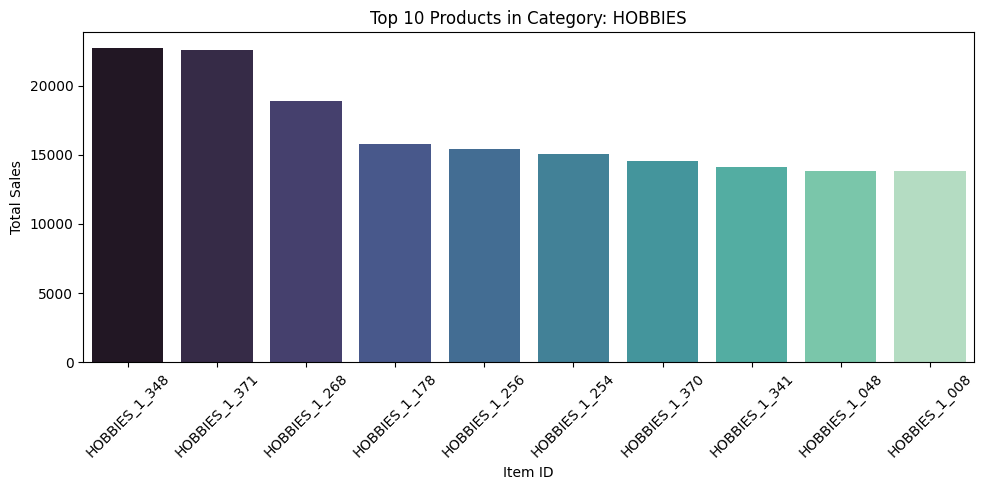

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




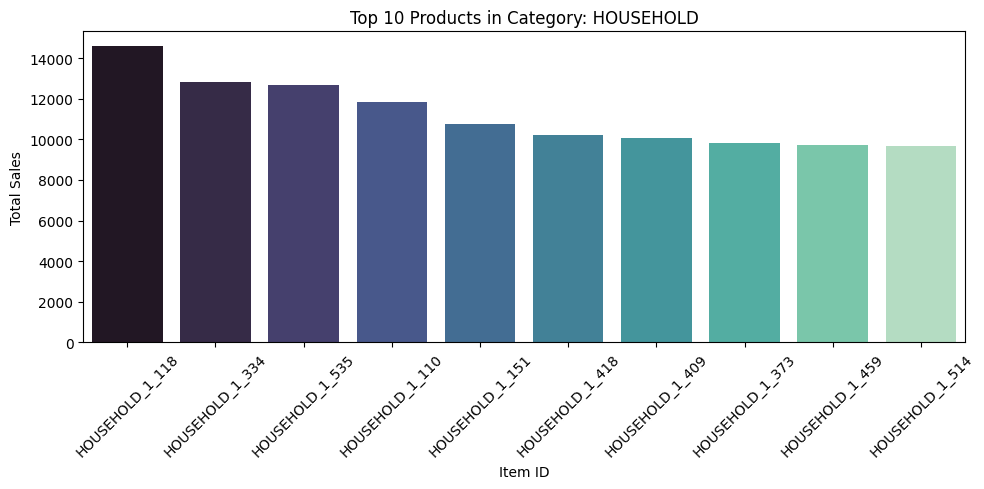

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




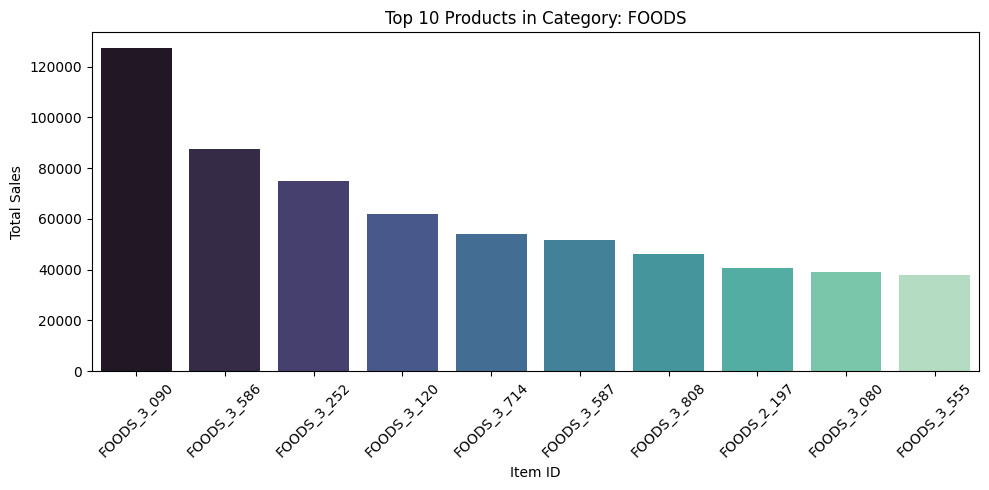

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




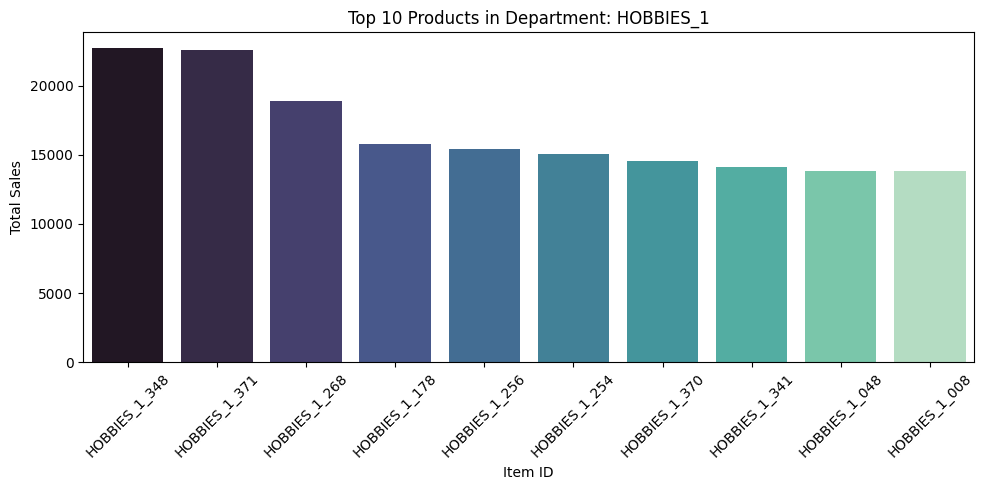

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




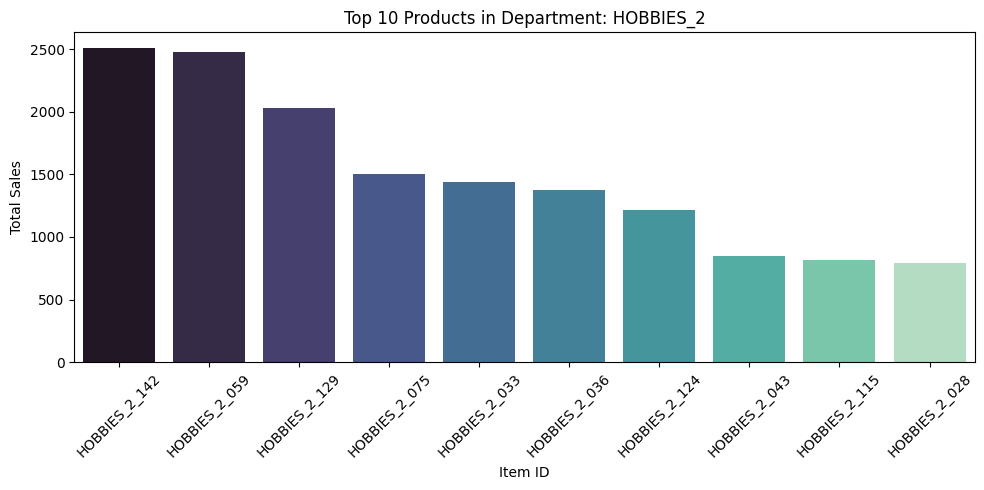

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




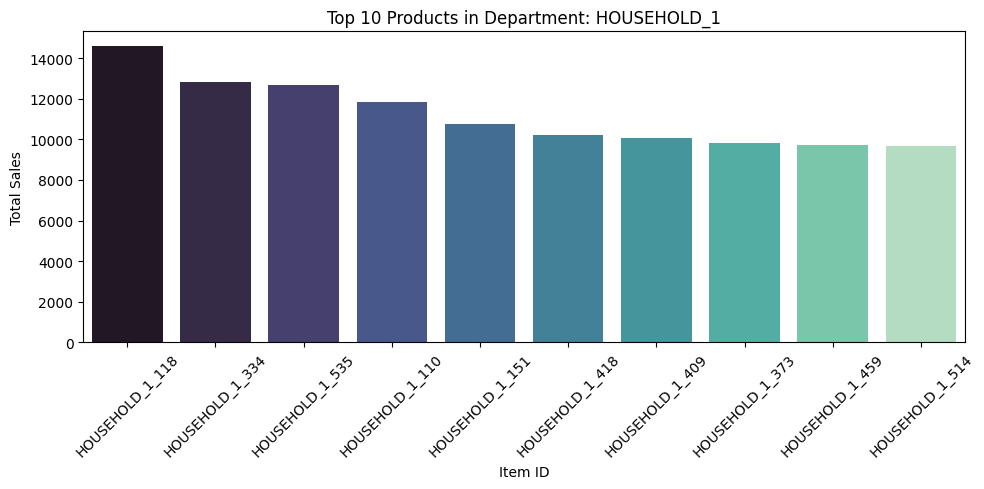

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




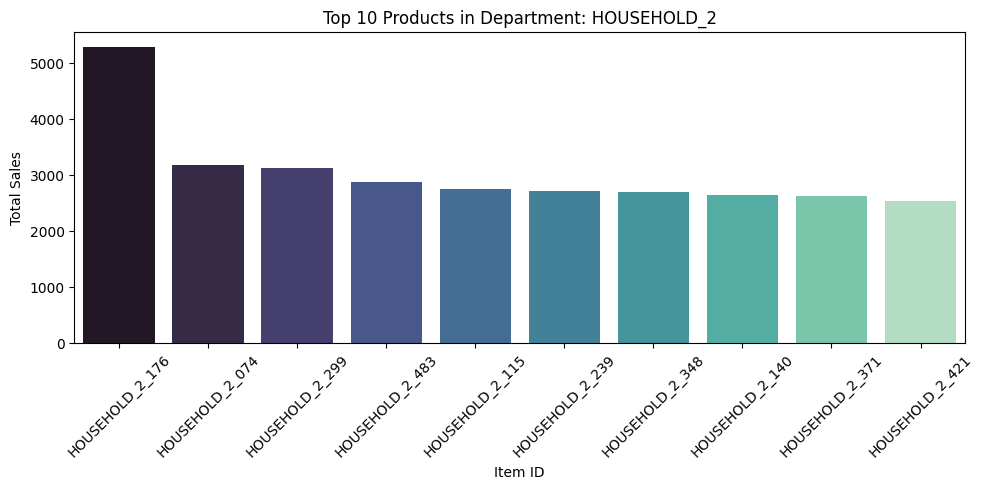

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




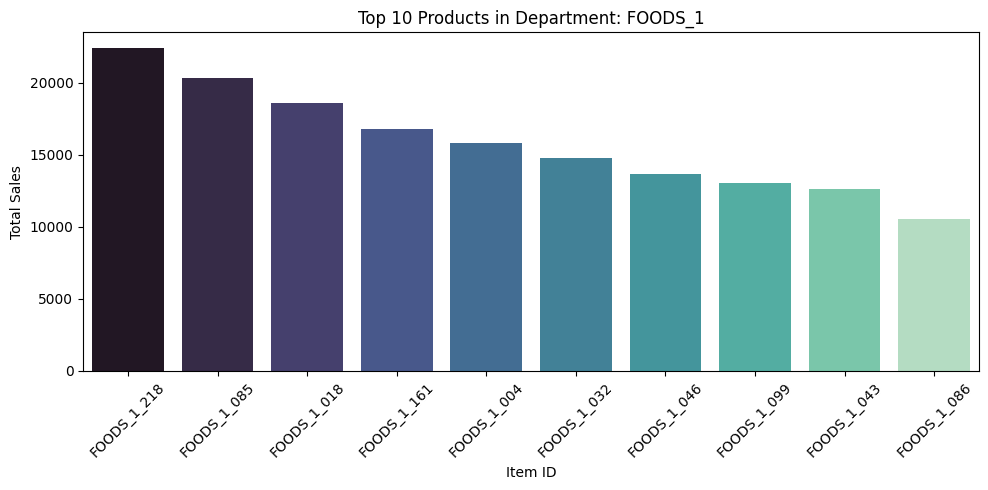

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




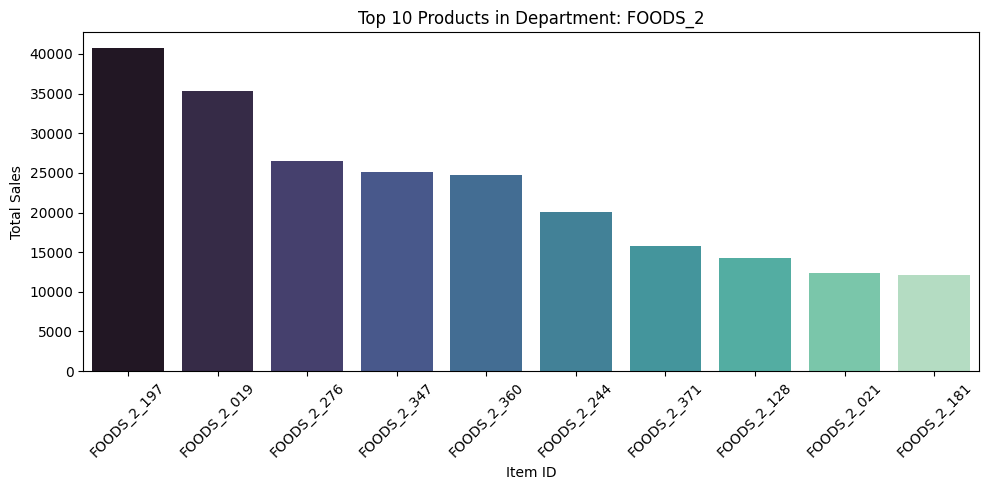

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




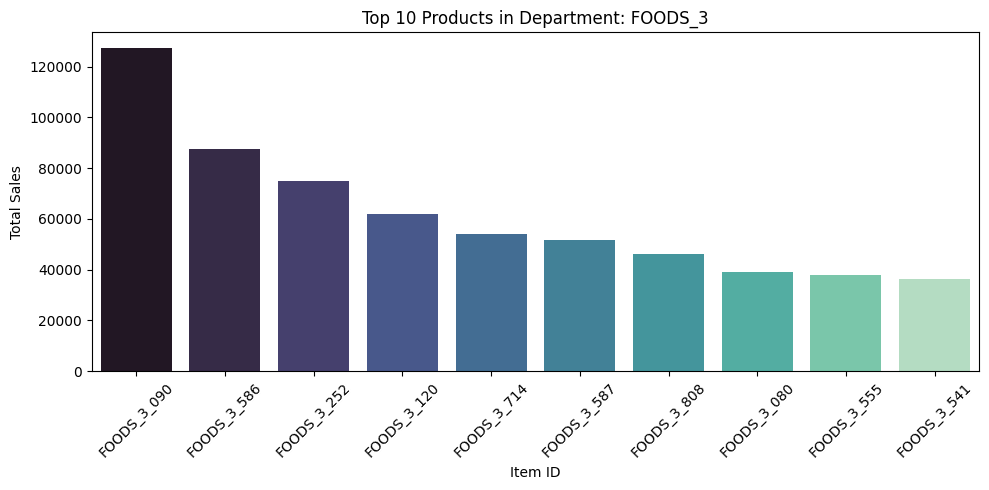

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




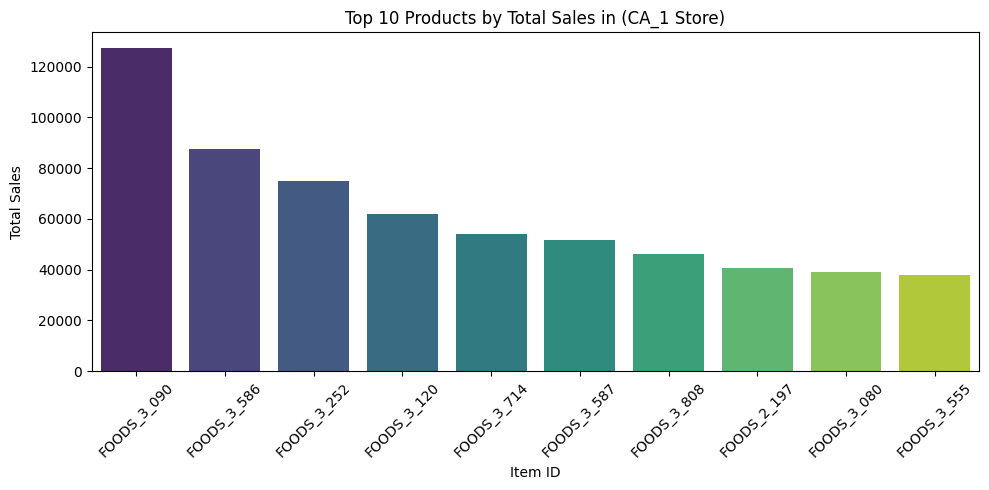

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




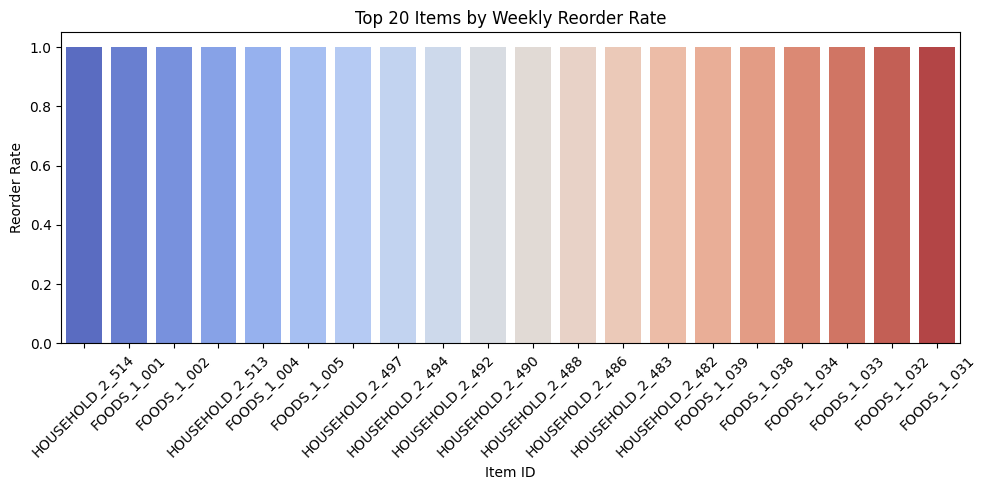

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




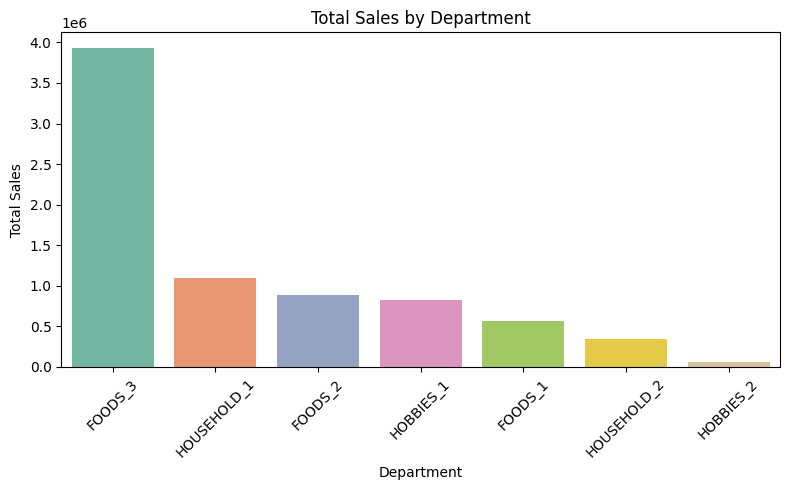

/tmp/ipython-input-644169616.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




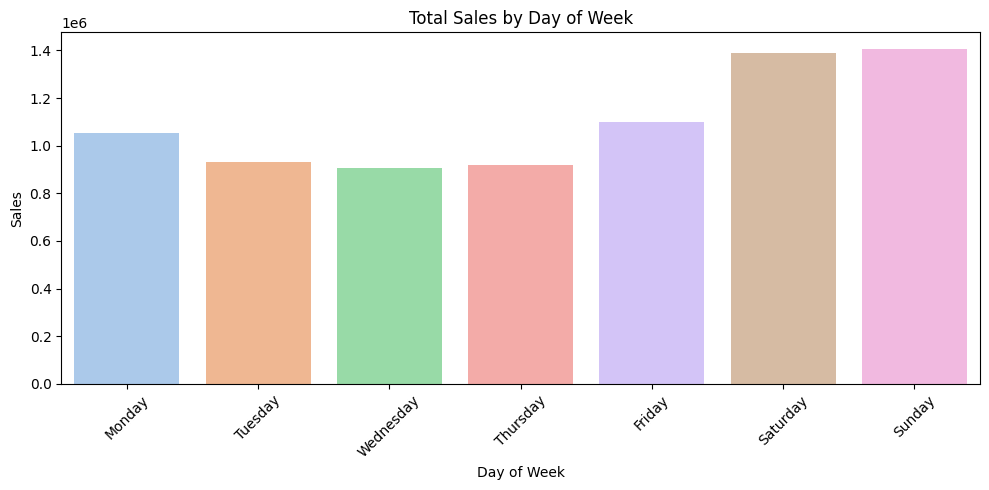

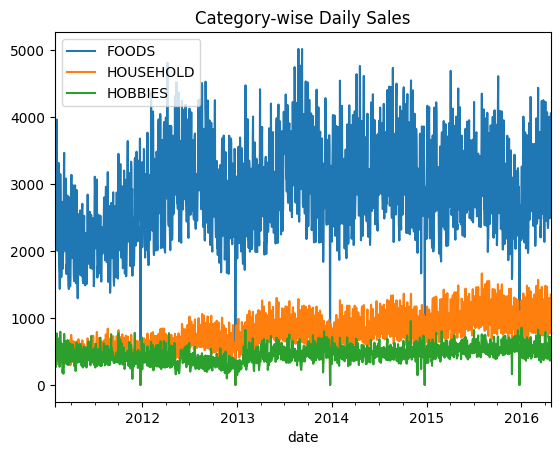

In [178]:
### ---- 1. Top 10 Products Sold by Categories ---- ###

for category in sales_long['cat_id'].unique():
    top_cat_products = (
        sales_long[sales_long['cat_id'] == category]
        .groupby('item_id')['sales']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    plot_bar(
        top_cat_products,
        title=f"Top 10 Products in Category: {category}",
        xlabel="Item ID",
        ylabel="Total Sales",
        palette="mako"
    )
### ---- 1. Top 10 Products Sold by Department ---- ###

for department in sales_long['dept_id'].unique():
    top_cat_products = (
        sales_long[sales_long['dept_id'] == department]
        .groupby('item_id')['sales']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    plot_bar(
        top_cat_products,
        title=f"Top 10 Products in Department: {department}",
        xlabel="Item ID",
        ylabel="Total Sales",
        palette="mako"
    )

top_products = sales_long.groupby('item_id')['sales'].sum().sort_values(ascending=False).head(10)
plot_bar(top_products, "Top 10 Products by Total Sales in (CA_1 Store)", "Item ID", "Total Sales")

### ---- 2. Simulated Reordered Products (Weekly) ---- ###

weekly_sales = sales_long.groupby(['item_id', 'week'])['sales'].sum().reset_index()
weekly_sales['reordered'] = (weekly_sales['sales'] > 0).astype(int)
reorder_rate = weekly_sales.groupby('item_id')['reordered'].mean().sort_values(ascending=False).head(20)
plot_bar(reorder_rate, "Top 20 Items by Weekly Reorder Rate", "Item ID", "Reorder Rate", palette="coolwarm")

### ---- Reordered Products (Monthly)
monthly_sales = sales_long.groupby(['item_id', 'month'])['sales'].sum().reset_index()
monthly_sales['reordered'] = (monthly_sales['sales'] > 0).astype(int)
reorder_rate = monthly_sales.groupby('item_id')['reordered'].mean()
total_sales = monthly_sales.groupby('item_id')['sales'].sum()

# --- 3. Merge into a single DataFrame ---
reorder_df = pd.DataFrame({
    'reorder_rate': reorder_rate,
    'total_sales': total_sales
}).sort_values('reorder_rate', ascending=False).head(20).reset_index()

# --- 4. Create interactive bar chart with Plotly ---
fig = px.bar(
    reorder_df,
    x='item_id',
    y='reorder_rate',
    color='total_sales',
    color_continuous_scale='Bluered_r',
    hover_data={'total_sales': True, 'reorder_rate': ':.2f', 'item_id': False},
    labels={'item_id': 'Item ID', 'reorder_rate': 'Reorder Rate', 'total_sales': 'Total Sales'},
    title='🔁 Top 20 Items by Monthly Reorder Rate (Color = Total Sales)'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### ---- 3. Top Departments by Reordered Products ---- ###
dept_sales = sales_long.groupby('dept_id')['sales'].sum().sort_values(ascending=False)
plot_bar(dept_sales, "Total Sales by Department", "Department", "Total Sales", figsize=(8, 5), palette="Set2")

### ---- 4. Orders (Sales) by Day of the Week ---- ###
dow_sales = sales_long.groupby('weekday')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plot_bar(dow_sales, "Total Sales by Day of Week", "Day of Week", "Sales", palette="pastel")

for cat in ['FOODS', 'HOUSEHOLD', 'HOBBIES']:
    series = sales_long[sales_long['cat_id'] == cat].groupby('date')['sales'].sum()
    series.plot(label=cat)
plt.legend()
plt.title("Category-wise Daily Sales")
plt.show()


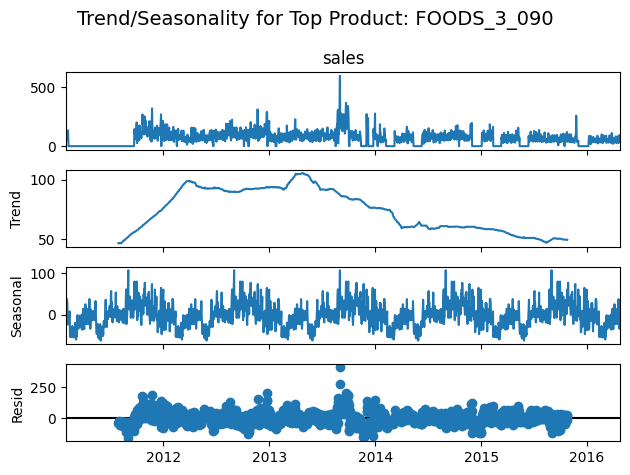

In [179]:
### ---- 5. General Trend & Seasonality (Example Product) ---- ###
example_item = sales_long[sales_long['item_id'] == top_products.index[0]]
daily_series = example_item.groupby('date')['sales'].sum()
# Seasonal decomposition
decomp = seasonal_decompose(daily_series, model='additive', period=365)
decomp.plot()
plt.suptitle(f"Trend/Seasonality for Top Product: {top_products.index[0]}", fontsize=14)
plt.tight_layout()
plt.show()

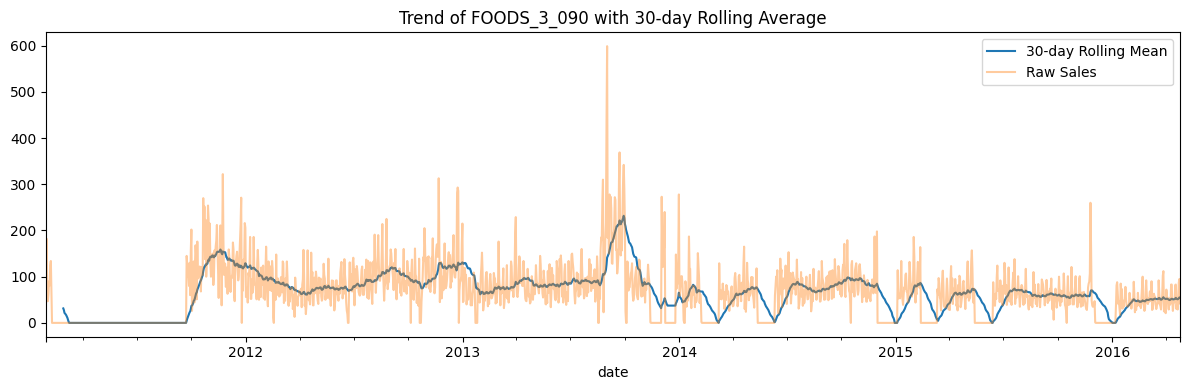

In [180]:
# Rolling average for general trend
plt.figure(figsize=(12, 4))
daily_series.rolling(window=30).mean().plot(label='30-day Rolling Mean')
daily_series.plot(alpha=0.4, label='Raw Sales')
plt.title(f"Trend of {top_products.index[0]} with 30-day Rolling Average")
plt.legend()
plt.tight_layout()
plt.show()


In [181]:
### ---- 6. Basic Feature Engineering ---- ###
sales_long = sales_long.sort_values(['id', 'date'])
sales_long['lag_7'] = sales_long.groupby('id')['sales'].shift(7)
sales_long['rolling_mean_30'] = sales_long.groupby('id')['sales'].shift(1).rolling(30).mean()
sales_long['rolling_std_30'] = sales_long.groupby('id')['sales'].shift(1).rolling(30).std()

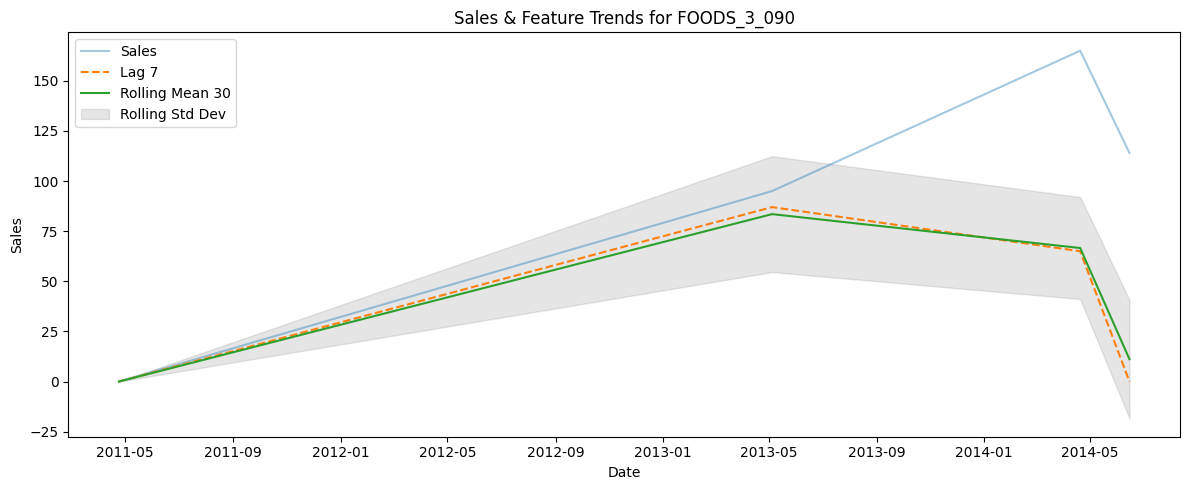

In [182]:
# Visualize features for a top product
fe_sample = sales_long[sales_long['item_id'] == top_products.index[0]].dropna().copy()

plt.figure(figsize=(12, 5))
plt.plot(fe_sample['date'], fe_sample['sales'], label='Sales', alpha=0.4)
plt.plot(fe_sample['date'], fe_sample['lag_7'], label='Lag 7', linestyle='--')
plt.plot(fe_sample['date'], fe_sample['rolling_mean_30'], label='Rolling Mean 30')
plt.fill_between(fe_sample['date'],
                 fe_sample['rolling_mean_30'] - fe_sample['rolling_std_30'],
                 fe_sample['rolling_mean_30'] + fe_sample['rolling_std_30'],
                 color='gray', alpha=0.2, label='Rolling Std Dev')
plt.title(f"Sales & Feature Trends for {top_products.index[0]}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


# **Forecast**

In [183]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [184]:
# Step 1: Build time series for FOOD Category
cat_series = sales_long.groupby(['cat_id', 'date'])['sales'].sum().reset_index()
ts_wide = cat_series.pivot(index='date', columns='cat_id', values='sales')
ts_wide.head()

cat_id      FOODS  HOBBIES  HOUSEHOLD
date                                 
2011-01-29   3239      556        542
2011-01-30   3137      498        520
2011-01-31   2008      415        393
2011-02-01   2258      392        401
2011-02-02   2032      268        330

In [185]:
series=ts_wide['FOODS']


<Axes: xlabel='date'>

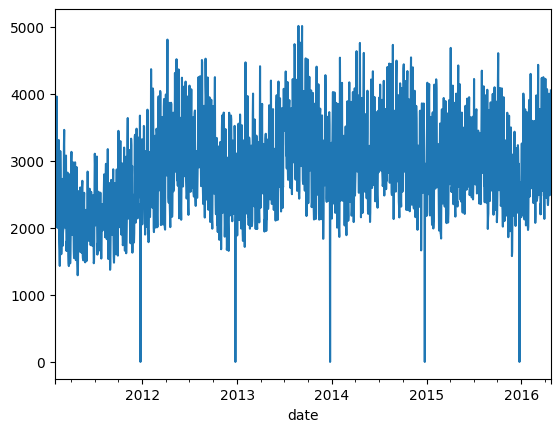

In [186]:
#plot series time series
series.plot()

In [187]:
#check stationarity
result = adfuller(series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -2.393878865052379
p-value: 0.143471512339925
Non-stationary ❌


In [188]:
#Non seasonal differencing
series_diff1=series.diff().dropna()
result = adfuller(series_diff1)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -21.436253802377934
p-value: 0.0
Stationary ✅


<Axes: xlabel='date'>

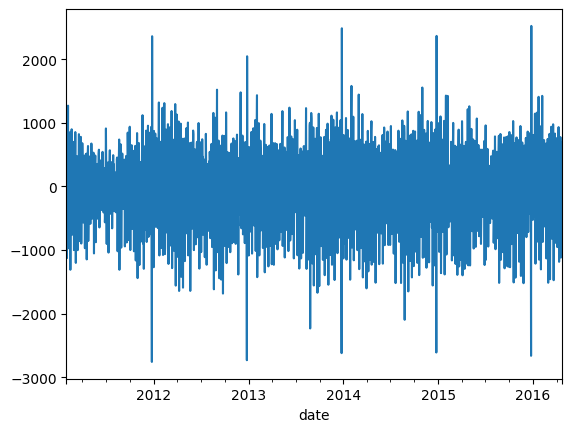

In [189]:
series_diff1.plot()

In [190]:
series_diff2=series.diff(7).dropna()
result = adfuller(series_diff2)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Stationary ✅" if result[1] < 0.05 else "Non-stationary ❌")

ADF Statistic: -18.854236750616053
p-value: 0.0
Stationary ✅


<Axes: xlabel='date'>

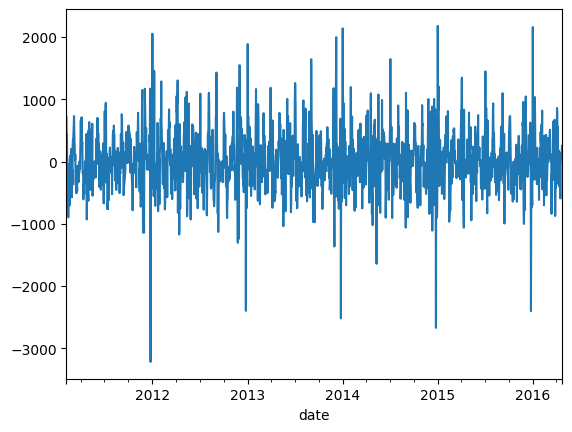

In [191]:
series_diff2.plot()

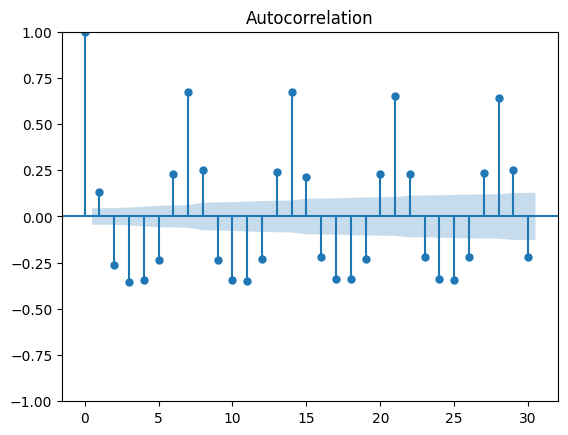

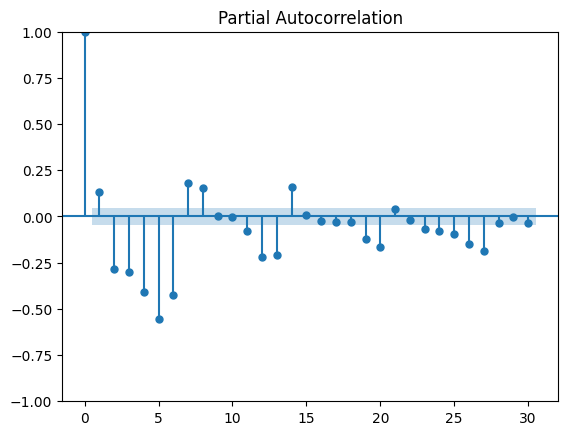

In [192]:
# Step 6: ACF & PACF to choose ARIMA(p,d,q)
plot_acf(series_diff1, lags=30)
plot_pacf(series_diff1, lags=30)
plt.show()

**ARIMA**

In [193]:
# Step 7: Fit ARIMA model
model = ARIMA(series, order=(4,1,2))
model_fit = model.fit()
print(model_fit.summary())
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferr

                               SARIMAX Results                                
Dep. Variable:                  FOODS   No. Observations:                 1913
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -14077.600
Date:                Mon, 04 Aug 2025   AIC                          28169.200
Time:                        12:06:14   BIC                          28208.092
Sample:                    01-29-2011   HQIC                         28183.513
                         - 04-24-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7423      0.018     40.343      0.000       0.706       0.778
ar.L2         -0.8436      0.023    -36.526      0.000      -0.889      -0.798
ar.L3          0.0878      0.023      3.824      0.0

In [194]:
split_index = int(len(series) * 0.8)
train = series.iloc[:split_index]
test = series.iloc[split_index:]

In [195]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index  # Align the forecast with test dates

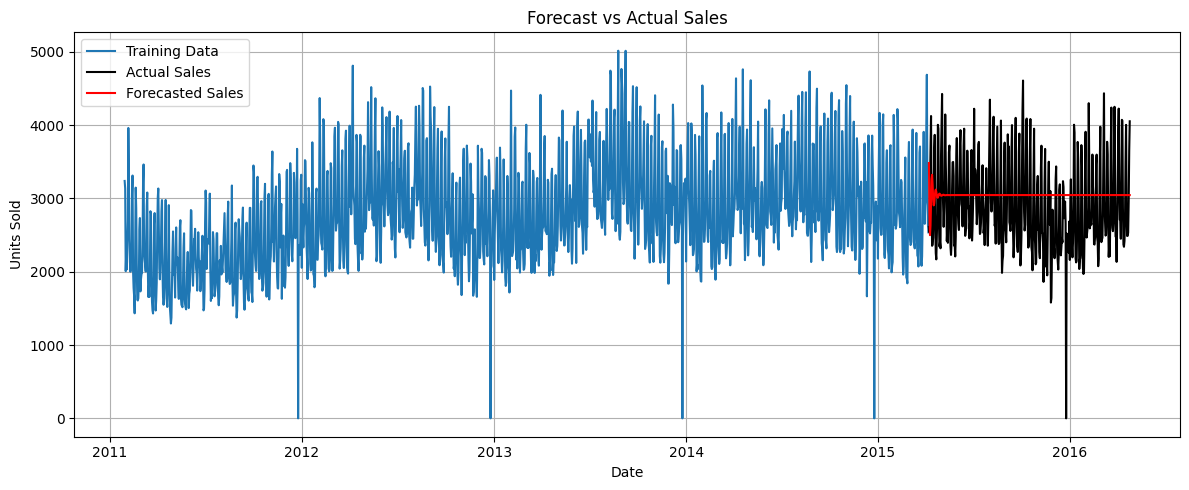

In [196]:

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

maeArima = mean_absolute_error(test, forecast)
rmseArima = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {maeArima}, RMSE: {rmseArima}")

MAE: 554.435916041512, RMSE: 647.5620266195516


**SARIMA**

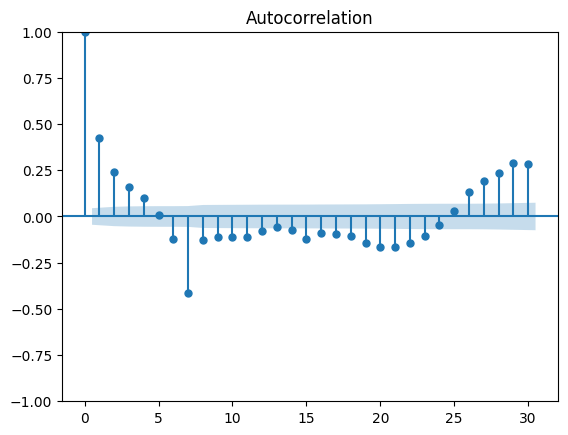

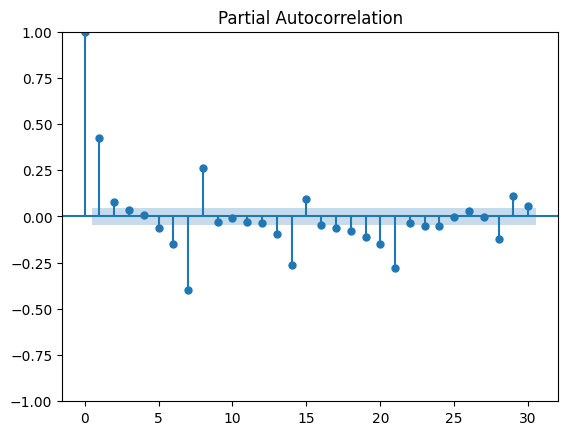

In [198]:
# Step 6: ACF & PACF to choose seaonal ARIMA paramters(P,D,Q)
plot_acf(series_diff2, lags=30)
plot_pacf(series_diff2, lags=30)
plt.show()

In [199]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(2,1,2),
                seasonal_order=(1,1,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               FOODS   No. Observations:                 1530
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood              -10948.558
Date:                             Mon, 04 Aug 2025   AIC                          21911.116
Time:                                     12:06:21   BIC                          21948.364
Sample:                                 01-29-2011   HQIC                         21924.987
                                      - 04-07-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4254      0.043     33.223      0.000       1.341       1.510
ar.L2         -0.5447      0.022    -25.020      0.000      -0.587      -0.502
ma.L1         -1.8500      0.044    -42.018      0.000      -1.936      -1.764
ma.L2          0.8558      0.043     19.809      0.000       0.771       0.940
ar.S.L7        0.1863      0.031      6.049      0.000       0.126       0.247
ma.S.L7       -0.9357      0.015    -61.463      0.000      -0.966      -0.906
sigma2      1.245e+05   2417.635     51.504      0.000     1.2e+05    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                  19.94   Jarque-Bera (JB):              6271.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.91
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

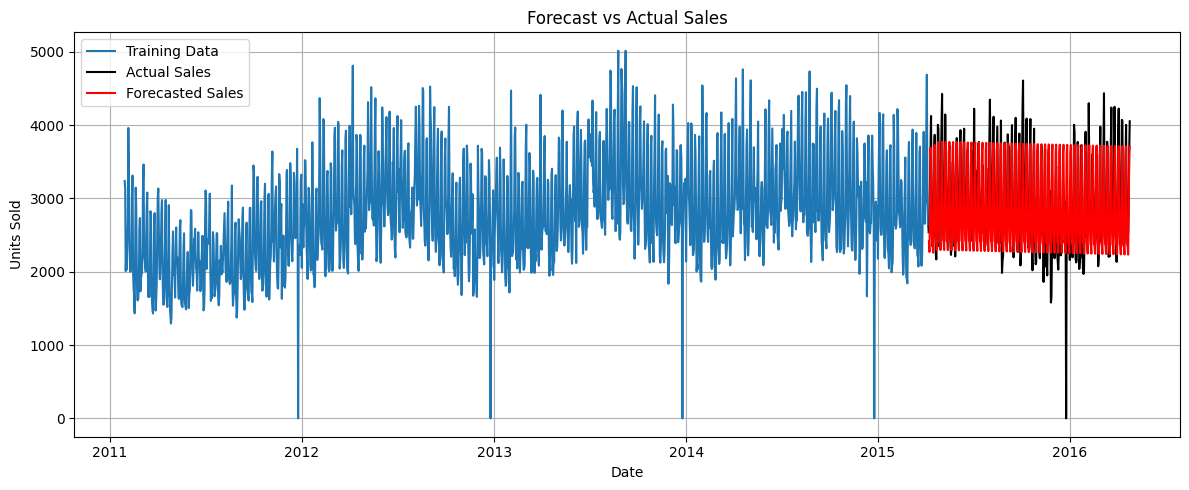

In [200]:
forecast = results.forecast(steps=len(test))
forecast.index = test.index  # Align the forecast with test dates
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [201]:
maeSarima = mean_absolute_error(test, forecast)
rmseSarima = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {maeSarima}, RMSE: {rmseSarima}")

MAE: 267.633447303104, RMSE: 370.5066010155563


**SARIMAX**

In [202]:
exog_vars = pd.get_dummies(sales_long[['weekday', 'event_name_1','event_name_2']], drop_first=True)

# Add snap_CA
exog_vars['snap_CA'] = sales_long['snap_CA']

In [203]:
exog_df = sales_long[['date', 'cat_id', 'weekday', 'event_name_1','event_name_2', 'snap_CA']]

# Keep only 'FOODS' category
exog_df = exog_df[exog_df['cat_id'] == 'FOODS']

# Group by date to match series
exog_df = exog_df.groupby('date').agg({
    'weekday': lambda x: x.mode()[0],   # most common weekday
    'event_name_1': lambda x: x.mode(dropna=True)[0] if not x.dropna().empty else 'None',
    'event_name_2': lambda x: x.mode(dropna=True)[0] if not x.dropna().empty else 'None',
    'snap_CA': 'max'  # if any day has SNAP=1, keep it
}).reset_index()

# One-hot encode
exog_df_encoded = pd.get_dummies(exog_df.set_index('date'), drop_first=True)

# Final alignment
exog_df_encoded = exog_df_encoded.astype(int)
exog_df_encoded = exog_df_encoded.loc[series.index]  # same date index as series

exog_train = exog_df_encoded.loc[train.index]
exog_test = exog_df_encoded.loc[test.index]



In [204]:
print(test.index)
print(train.index)
print(exog_train.index)
print(exog_test.index)

DatetimeIndex(['2015-04-08', '2015-04-09', '2015-04-10', '2015-04-11',
               '2015-04-12', '2015-04-13', '2015-04-14', '2015-04-15',
               '2015-04-16', '2015-04-17',
               ...
               '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-23', '2016-04-24'],
              dtype='datetime64[ns]', name='date', length=383, freq=None)
DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2015-03-29', '2015-03-30', '2015-03-31', '2015-04-01',
               '2015-04-02', '2015-04-03', '2015-04-04', '2015-04-05',
               '2015-04-06', '2015-04-07'],
              dtype='datetime64[ns]', name='date', length=1530, freq=None)
DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',


In [205]:
exog_df_encoded.head()

snap_CA  weekday_Monday  weekday_Saturday  weekday_Sunday  \
date                                                                    
2011-01-29        0               0                 1               0   
2011-01-30        0               0                 0               1   
2011-01-31        0               1                 0               0   
2011-02-01        1               0                 0               0   
2011-02-02        1               0                 0               0   

            weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
date                                                               
2011-01-29                 0                0                  0   
2011-01-30                 0                0                  0   
2011-01-31                 0                0                  0   
2011-02-01                 0                1                  0   
2011-02-02                 0                0                  1   

            event_name_1_Christmas  event_name_1_Cinco De Mayo  \
date                                                             
2011-01-29                       0                           0   
2011-01-30                       0                           0   
2011-01-31                       0                           0   
2011-02-01                       0                           0   
2011-02-02                       0                           0   

            event_name_1_ColumbusDay  ...  event_name_1_Ramadan starts  \
date                                  ...                                
2011-01-29                         0  ...                            0   
2011-01-30                         0  ...                            0   
2011-01-31                         0  ...                            0   
2011-02-01                         0  ...                            0   
2011-02-02                         0  ...                            0   

            event_name_1_StPatricksDay  event_name_1_SuperBowl  \
date                                                             
2011-01-29                           0                       0   
2011-01-30                           0                       0   
2011-01-31                           0                       0   
2011-02-01                           0                       0   
2011-02-02                           0                       0   

            event_name_1_Thanksgiving  event_name_1_ValentinesDay  \
date                                                                
2011-01-29                          0                           0   
2011-01-30                          0                           0   
2011-01-31                          0                           0   
2011-02-01                          0                           0   
2011-02-02                          0                           0   

            event_name_1_VeteransDay  event_name_2_Easter  \
date                                                        
2011-01-29                         0                    0   
2011-01-30                         0                    0   
2011-01-31                         0                    0   
2011-02-01                         0                    0   
2011-02-02                         0                    0   

            event_name_2_Father's day  event_name_2_None  \
date                                                       
2011-01-29                          0                  1   
2011-01-30                          0                  1   
2011-01-31                          0                  1   
2011-02-01                          0                  1   
2011-02-02                          0                  1   

            event_name_2_OrthodoxEaster  
date                                     
2011-01-29                            0  
2011-01-30                            0  
2011-01-31                            0  
2011-02-01                         

In [206]:
model = SARIMAX(train,
                exog=exog_train,
                order=(2,1,2),
                seasonal_order=(1,1,1,30),
                enforce_stationarity=True,
                enforce_invertibility=False)
results = model.fit(maxiter=10000)
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                       
Dep. Variable:                                FOODS   No. Observations:                 1530
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood              -10441.909
Date:                              Mon, 04 Aug 2025   AIC                          20979.818
Time:                                      12:16:16   BIC                          21234.821
Sample:                                  01-29-2011   HQIC                         21074.819
                                       - 04-07-2015                                         
Covariance Type:                                opg                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
snap_CA                            217.9703     23.759

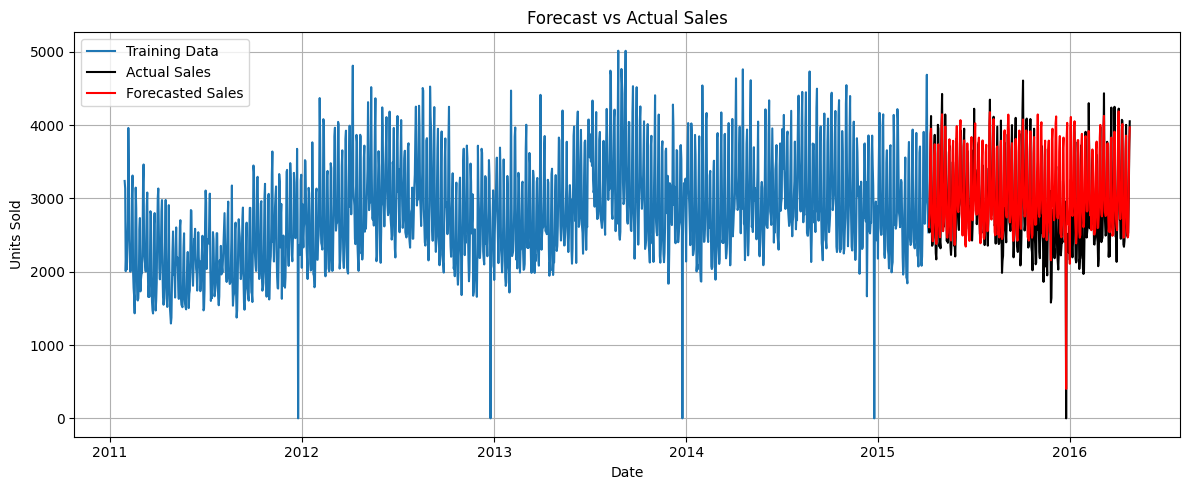

In [207]:
forecast_Sarimax = results.forecast(steps=len(test),exog=exog_test)
forecast_Sarimax.index = test.index  # Align the forecast with test dates
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast_Sarimax.index, forecast_Sarimax, label='Forecasted Sales', color='red')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [208]:
maeSarimax = mean_absolute_error(test, forecast_Sarimax)
rmseSarimax = np.sqrt(mean_squared_error(test, forecast_Sarimax))
print(f"MAE: {maeSarimax}, RMSE: {rmseSarimax}")

MAE: 267.0184118018568, RMSE: 358.11151573407017


**Exponential Smoothing**

In [209]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model (multiplicative or additive depending on data nature)
model = ExponentialSmoothing(
    train,
    trend='add',          # or 'mul' if data grows multiplicatively
    seasonal='add',       # or 'mul'
    seasonal_periods=7    # weekly seasonality for daily data
)

hw_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [210]:
forecast_hw = hw_fit.forecast(steps=len(test))  # Forecast same number of days as test
forecast_hw.index = test.index  # Align with test dates

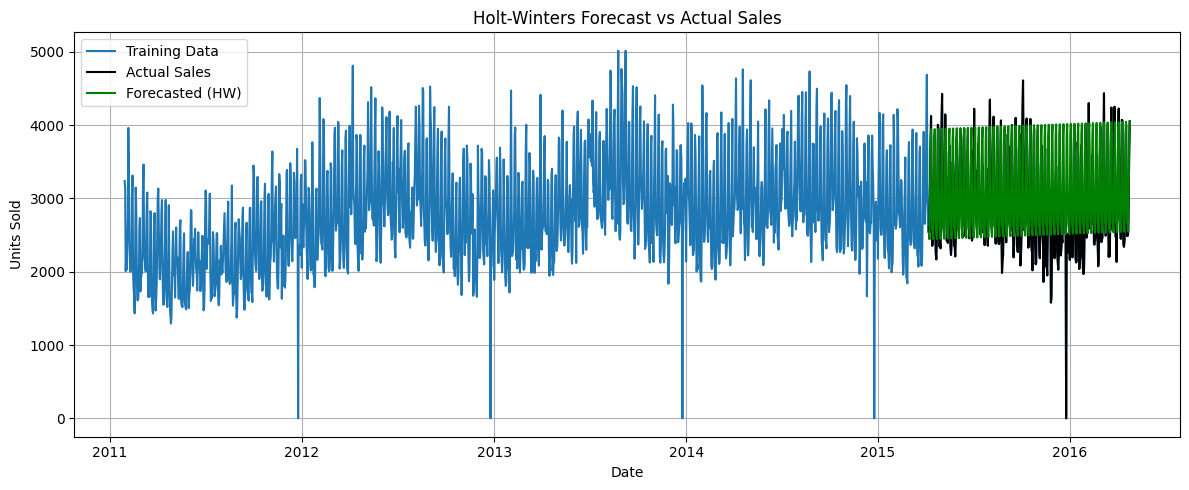

In [211]:
plt.figure(figsize=(12, 5))
plt.plot(series.index, series, label='Training Data')
plt.plot(test.index, test, label='Actual Sales', color='black')
plt.plot(forecast_hw.index, forecast_hw, label='Forecasted (HW)', color='green')

plt.title("Holt-Winters Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [212]:
maeES = mean_absolute_error(test, forecast_hw)
rmseES = np.sqrt(mean_squared_error(test, forecast_hw))
print(f"MAE: {maeES}, RMSE: {rmseES}")

MAE: 309.92482960117053, RMSE: 421.3140641194715


**Prophet Model**

In [213]:
!pip install prophet

In [214]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [216]:
train.head()
df=train.reset_index()
df.columns = ['ds', 'y']
df.head()

ds     y
0 2011-01-29  3239
1 2011-01-30  3137
2 2011-01-31  2008
3 2011-02-01  2258
4 2011-02-02  2032

In [217]:
test.head()
df_test=test.reset_index()
df_test.columns = ['ds', 'y']
df_test.head()

ds     y
0 2015-04-08  2610
1 2015-04-09  2538
2 2015-04-10  3175
3 2015-04-11  3627
4 2015-04-12  4125

In [218]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1530 non-null   datetime64[ns]
 1   y       1530 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      383 non-null    datetime64[ns]
 1   y       383 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB


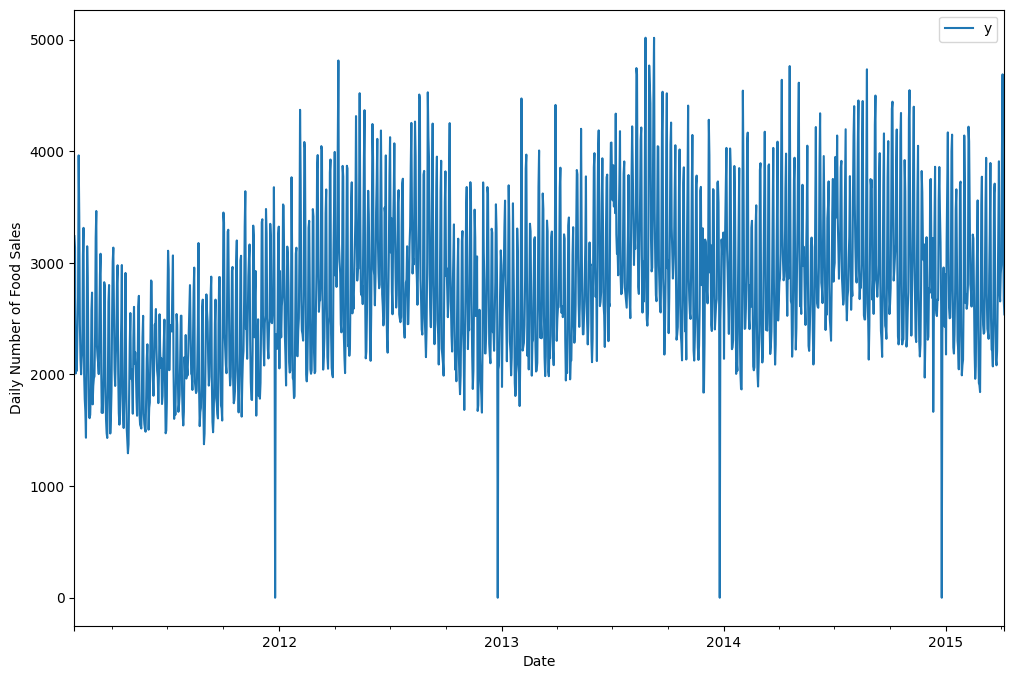

In [219]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily Number of Food Sales')
ax.set_xlabel('Date')

plt.show()

In [220]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet()

In [221]:
my_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/d8sl6_w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/3lbvad7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47099', 'data', 'file=/tmp/tmpox3v7oll/d8sl6_w5.json', 'init=/tmp/tmpox3v7oll/3lbvad7_.json', 'output', 'file=/tmp/tmpox3v7oll/prophet_modelv5s1a_9v/prophet_model-20250804121622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [222]:
forecast = my_model.predict(df_test)
forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2015-04-08  2983.147701  2073.218662  3005.491807  2983.147701  2983.147701   
1 2015-04-09  2983.018767  2085.140327  2995.273638  2983.018767  2983.018767   
2 2015-04-10  2982.889833  2572.942526  3524.254659  2982.889833  2982.889833   
3 2015-04-11  2982.760899  3238.351007  4177.931420  2982.760899  2982.760899   
4 2015-04-12  2982.631965  3371.272057  4259.909097  2982.631965  2982.631965   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -469.760481           -469.760481           -469.760481 -505.929886   
1     -436.720137           -436.720137           -436.720137 -468.730960   
2       54.796853             54.796853             54.796853   27.854453   
3      746.804381            746.804381            746.804381  725.708326   
4      807.627942            807.627942            807.627942  793.012169   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0   -505.929886   -505.929886  36.169405     36.169405     36.169405   
1   -468.730960   -468.730960  32.010822     32.010822     32.010822   
2     27.854453     27.854453  26.942400     26.942400     26.942400   
3    725.708326    725.708326  21.096056     21.096056     21.096056   
4    793.012169    793.012169  14.615774     14.615774     14.615774   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2513.387219  
1                         0.0  2546.298630  
2                         0.0  3037.686686  
3                         0.0  3729.565281  
4                         0.0  3790.259908

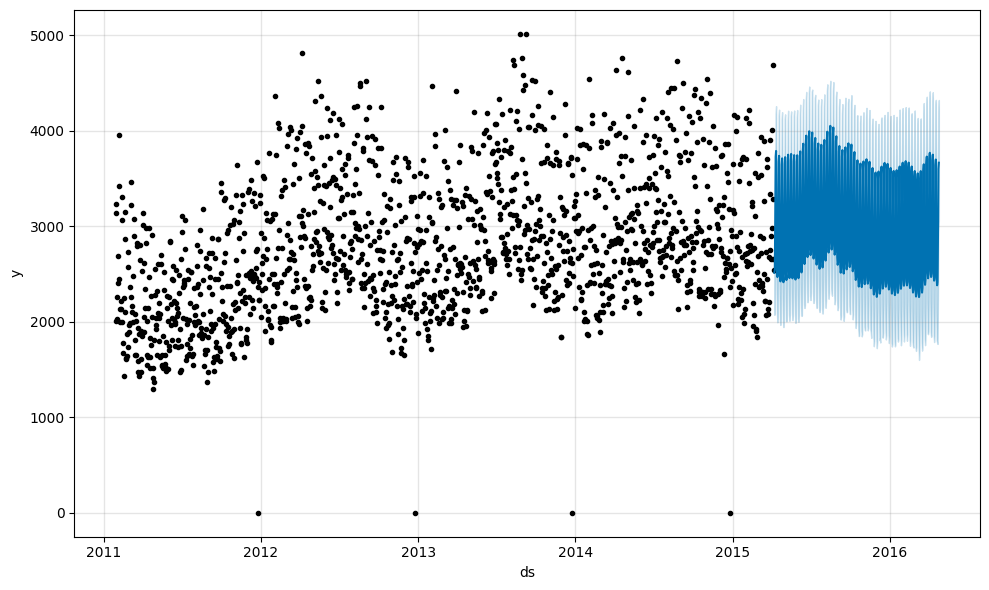

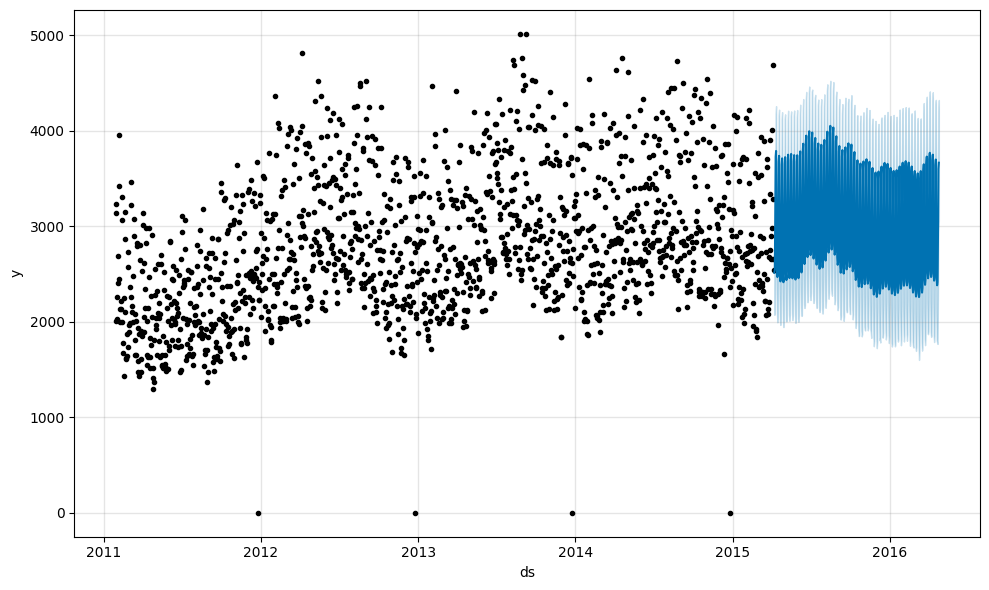

In [223]:
my_model.plot(forecast)

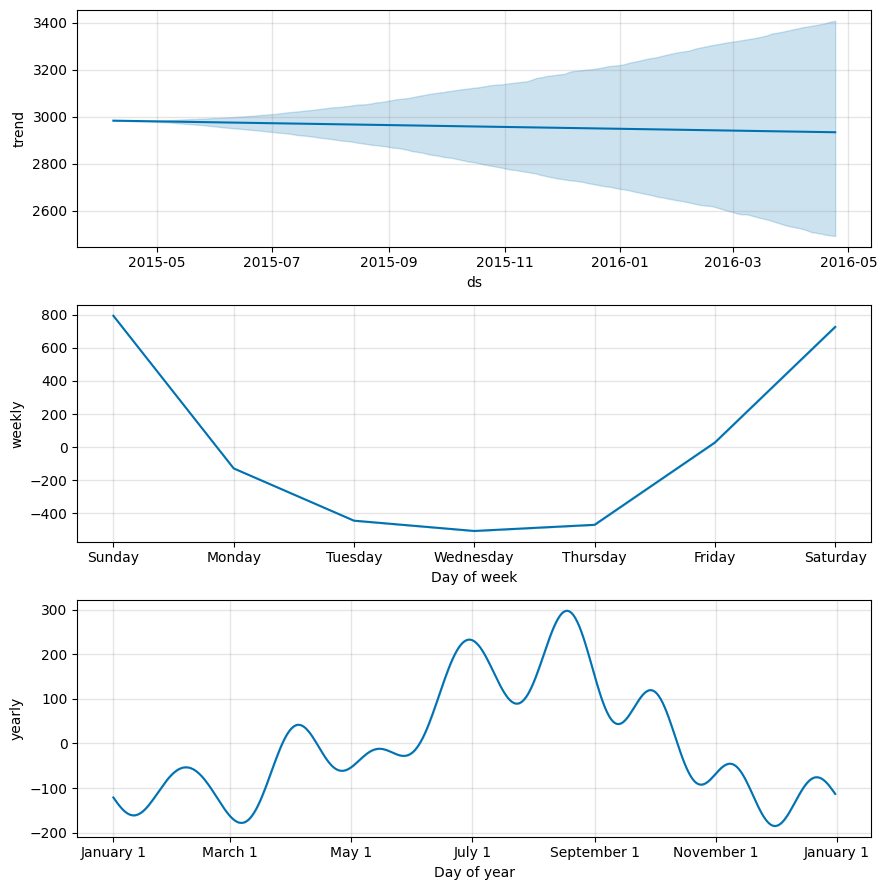

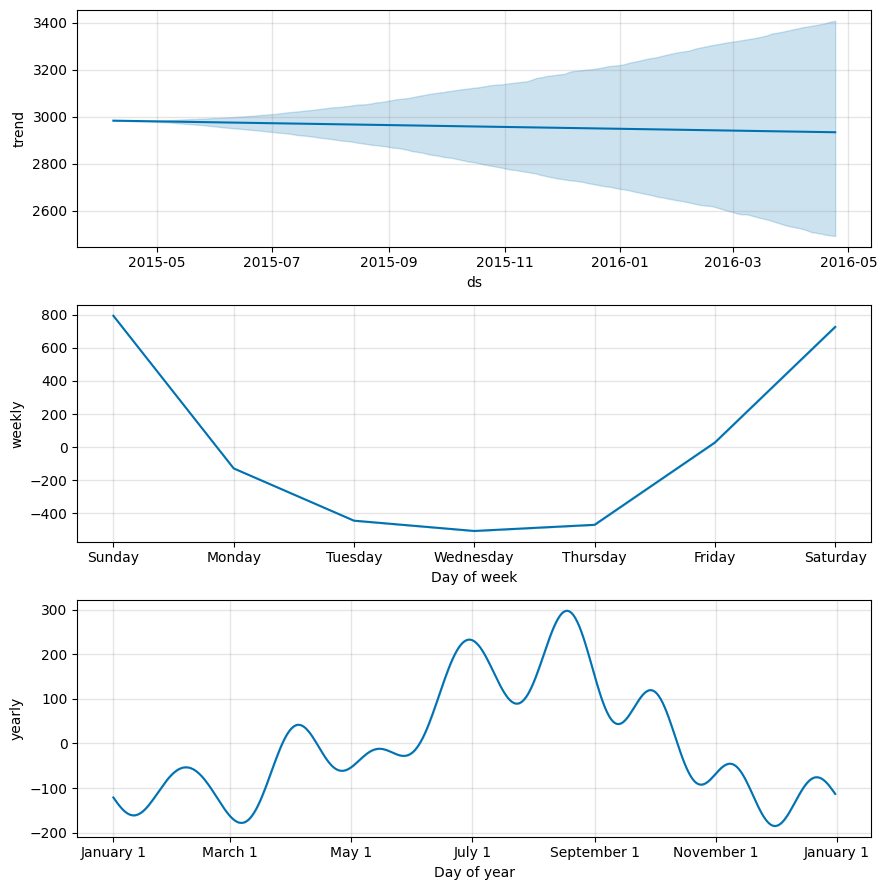

In [224]:
my_model.plot_components(forecast)

In [225]:
mae = mean_absolute_error(df_test['y'],forecast['yhat'])
rmse = np.sqrt(mean_squared_error(df_test['y'],forecast['yhat']))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 252.5242321532913, RMSE: 355.76948009002297


In [226]:
plot_plotly(my_model, forecast)

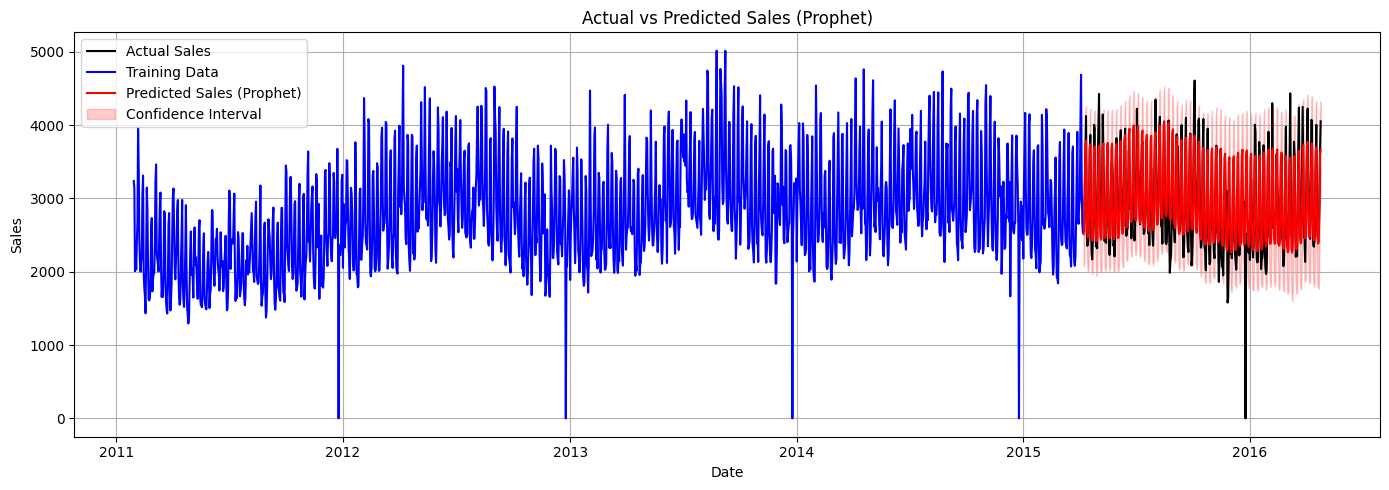

In [227]:
plt.figure(figsize=(14,5))

plt.plot(df_test['ds'], df_test['y'], label='Actual Sales', color='black')

# Plot predicted values from forecast
plt.plot(df['ds'], df['y'], label='Training Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales (Prophet)', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='red', alpha=0.2, label='Confidence Interval')

# Final touches
plt.title('Actual vs Predicted Sales (Prophet)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [228]:
#Apply holidays to prophet model
calendar['date'] = pd.to_datetime(calendar['date'])

# Let's say we're using "event_name_1" and "event_name_2"
holiday_events = calendar[calendar['event_name_1'].notna() | calendar['event_name_2'].notna()]

# Melt both columns into one list
holiday_1 = holiday_events[['date', 'event_name_1']].rename(columns={'event_name_1': 'holiday'})
holiday_2 = holiday_events[['date', 'event_name_2']].rename(columns={'event_name_2': 'holiday'})
m5_holidays = pd.concat([holiday_1, holiday_2]).dropna().reset_index(drop=True)
m5_holidays.rename(columns={'date': 'ds'}, inplace=True)
m5_holidays['lower_window']=-1
m5_holidays['upper_window']=1
m5_holidays.head(30)

ds              holiday  lower_window  upper_window
0  2011-02-06            SuperBowl            -1             1
1  2011-02-14        ValentinesDay            -1             1
2  2011-02-21        PresidentsDay            -1             1
3  2011-03-09            LentStart            -1             1
4  2011-03-16            LentWeek2            -1             1
5  2011-03-17        StPatricksDay            -1             1
6  2011-03-20            Purim End            -1             1
7  2011-04-24       OrthodoxEaster            -1             1
8  2011-04-26           Pesach End            -1             1
9  2011-05-05        Cinco De Mayo            -1             1
10 2011-05-08         Mother's day            -1             1
11 2011-05-30          MemorialDay            -1             1
12 2011-05-31       NBAFinalsStart            -1             1
13 2011-06-12         NBAFinalsEnd            -1             1
14 2011-06-19         Father's day            -1             1
15 2011-07-04      IndependenceDay            -1             1
16 2011-08-01       Ramadan starts            -1             1
17 2011-08-31          Eid al-Fitr            -1             1
18 2011-09-05             LaborDay            -1             1
19 2011-10-10          ColumbusDay            -1             1
20 2011-10-31            Halloween            -1             1
21 2011-11-07            EidAlAdha            -1             1
22 2011-11-11          VeteransDay            -1             1
23 2011-11-24         Thanksgiving            -1             1
24 2011-12-25            Christmas            -1             1
25 2011-12-28         Chanukah End            -1             1
26 2012-01-01              NewYear            -1             1
27 2012-01-07    OrthodoxChristmas            -1             1
28 2012-01-16  MartinLutherKingDay            -1             1
29 2012-02-05            SuperBowl            -1             1

In [229]:
def select_snaps(state):
    snap_days_CA = sales_long[sales_long['snap_CA']==1]['date'].unique()
    # snap_days_TX = sales_long[sales_long['snap_TX']==1]['date'].unique()
    # snap_days_WI = sales_long[sales_long['snap_TX']==1]['date'].unique()
    if state =='CA':
        return snap_days_CA
    # elif state == 'TX':
    #     return snap_days_TX
    # elif state == 'WI' :
    #     return snap_days_WI

In [230]:
my_holdiday_model=Prophet(holidays=m5_holidays)
my_holdiday_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/d79qxezb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/74cux9sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31646', 'data', 'file=/tmp/tmpox3v7oll/d79qxezb.json', 'init=/tmp/tmpox3v7oll/74cux9sy.json', 'output', 'file=/tmp/tmpox3v7oll/prophet_modelni11hzy1/prophet_model-20250804121624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [231]:
forecast_holiday = my_holdiday_model.predict(df_test)


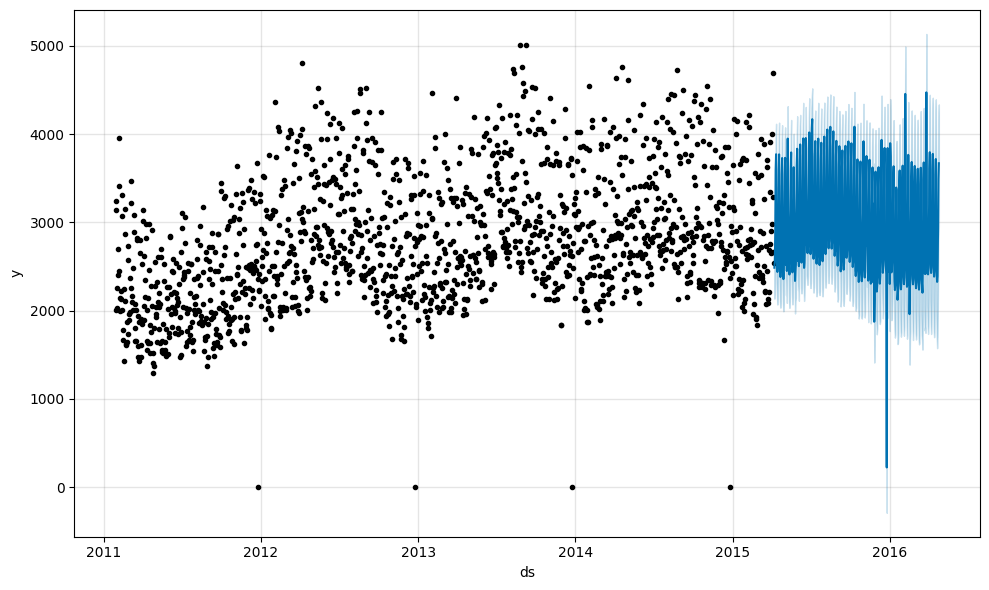

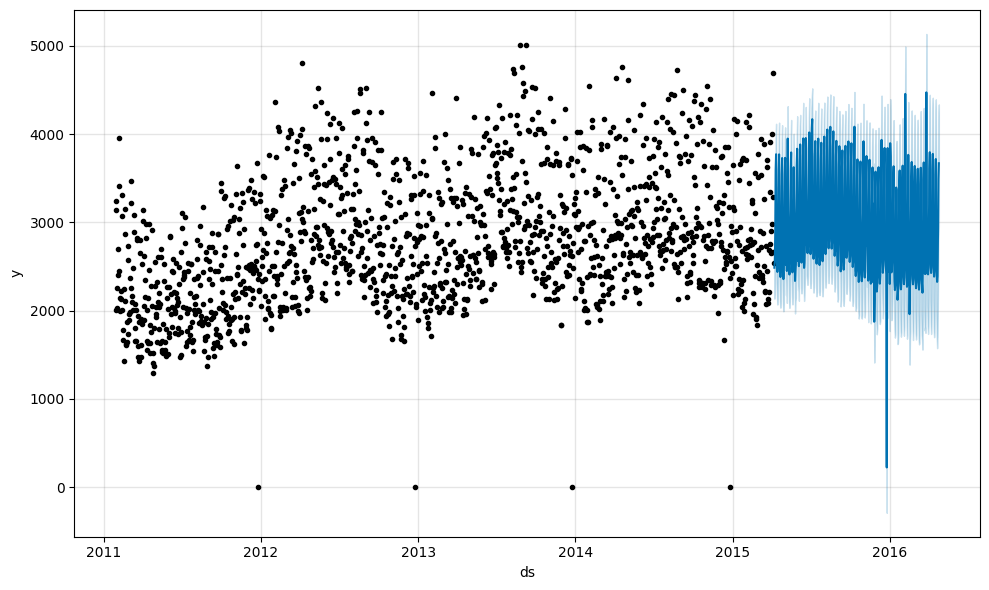

In [232]:
my_holdiday_model.plot(forecast_holiday)

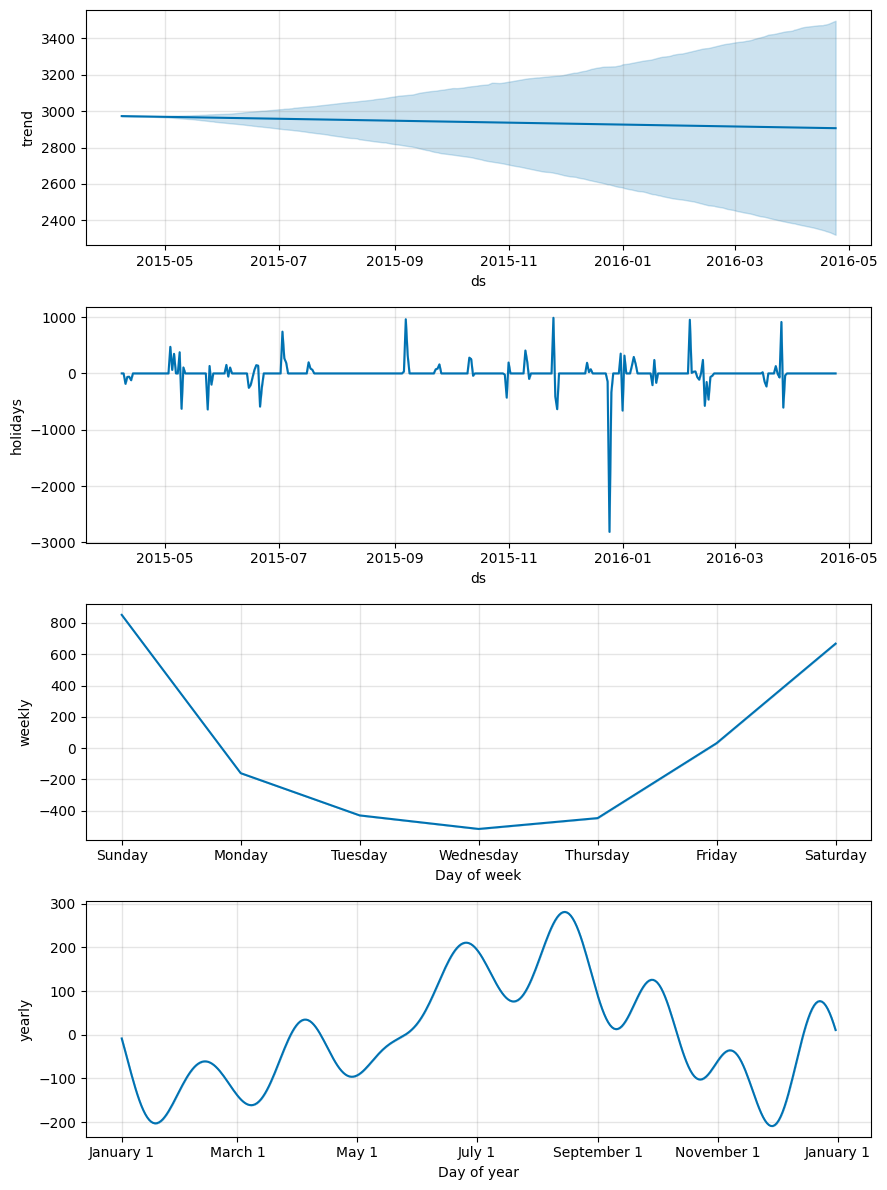

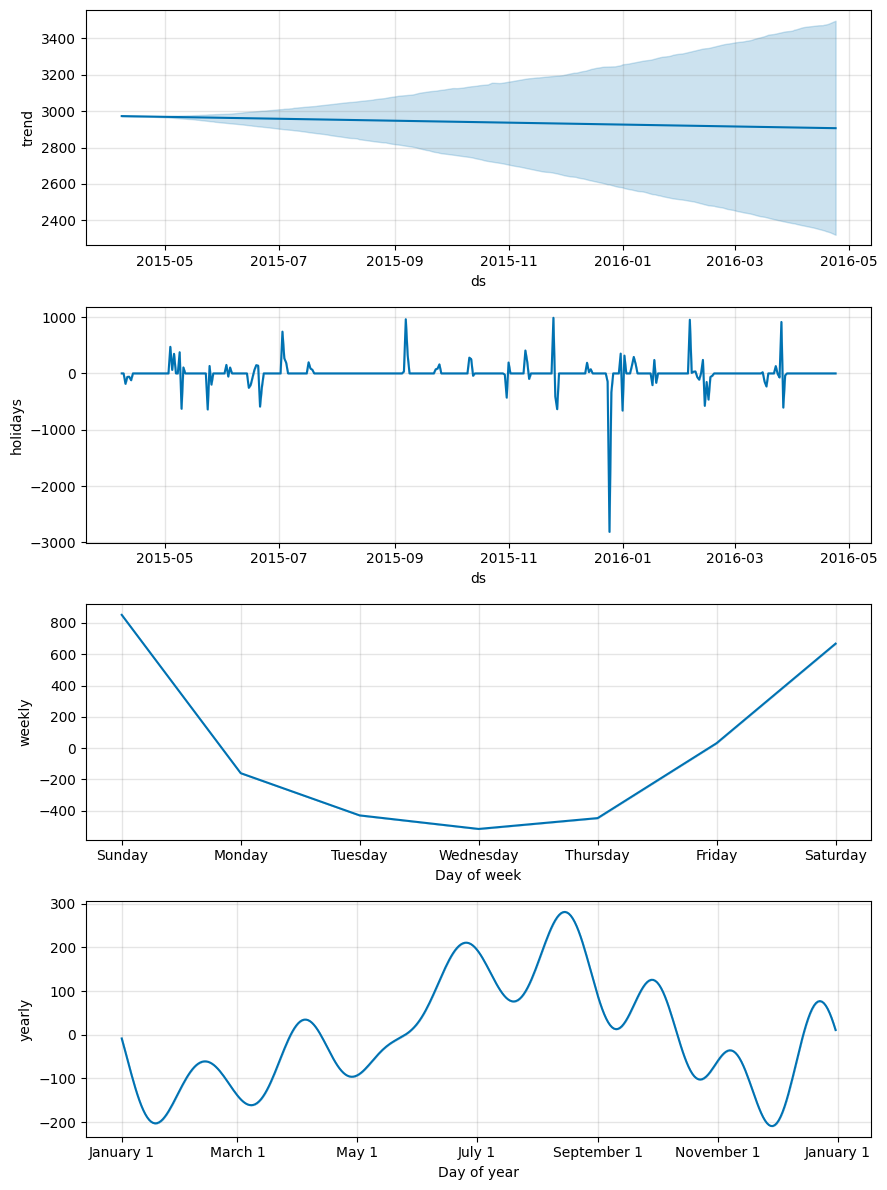

In [233]:
my_holdiday_model.plot_components(forecast_holiday)

In [234]:
maeProphet = mean_absolute_error(df_test['y'],forecast_holiday['yhat'])
rmseProphet = np.sqrt(mean_squared_error(df_test['y'],forecast_holiday['yhat']))
print(f"MAE: {maeProphet}, RMSE: {rmseProphet}")

MAE: 230.4127530972953, RMSE: 303.3492767332398


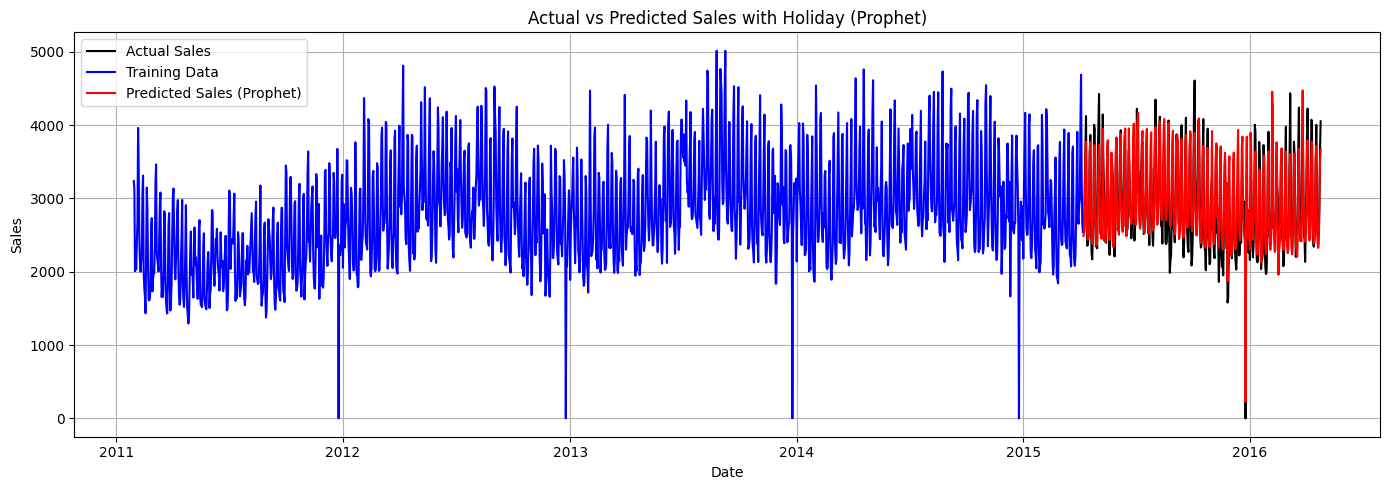

In [235]:
plt.figure(figsize=(14,5))

plt.plot(df_test['ds'], df_test['y'], label='Actual Sales', color='black')

#Plot predicted values from forecast
plt.plot(df['ds'], df['y'], label='Training Data', color='blue')
plt.plot(forecast_holiday['ds'], forecast_holiday['yhat'], label='Predicted Sales (Prophet)', color='red')
#plt.fill_between(forecast_holiday['ds'], forecast_holiday['yhat_lower'], forecast_holiday['yhat_upper'],
                 #color='red', alpha=0.2, label='Confidence Interval')

# Final touches
plt.title('Actual vs Predicted Sales with Holiday (Prophet)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [236]:
snap_days = pd.DataFrame({
      'holiday': 'snaps',
      'ds': pd.to_datetime(select_snaps('CA')),
      'lower_window': 0,
      'upper_window': 0,
    })

In [237]:
my_holdiday_snap_model=Prophet(holidays=pd.concat([m5_holidays, snap_days]))
my_holdiday_snap_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/6_xuy5a2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/02n4i9lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69033', 'data', 'file=/tmp/tmpox3v7oll/6_xuy5a2.json', 'init=/tmp/tmpox3v7oll/02n4i9lq.json', 'output', 'file=/tmp/tmpox3v7oll/prophet_model_61kq73i/prophet_model-20250804121628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [238]:
forecast_holiday_snap = my_holdiday_snap_model.predict(df_test)

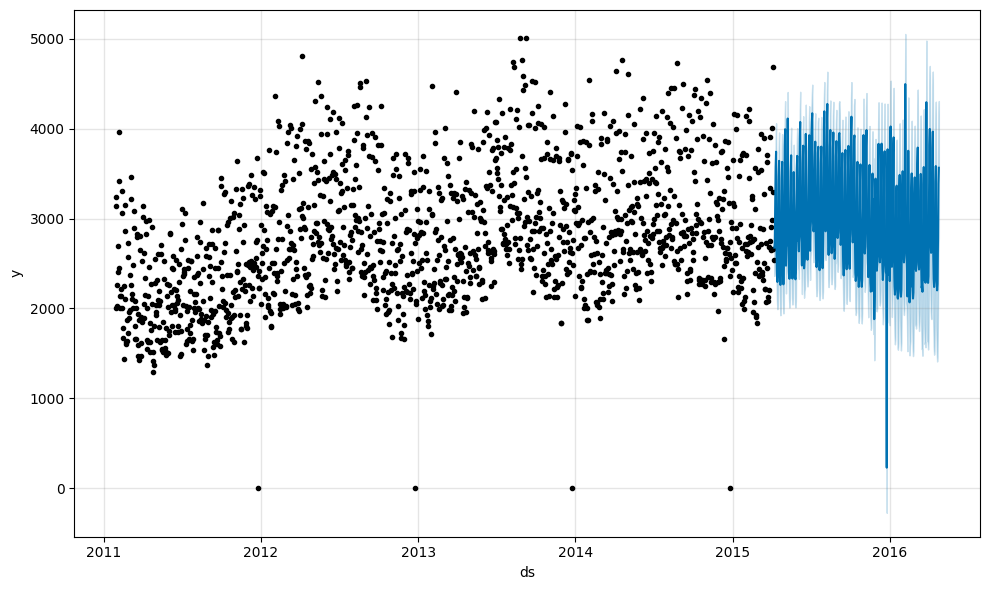

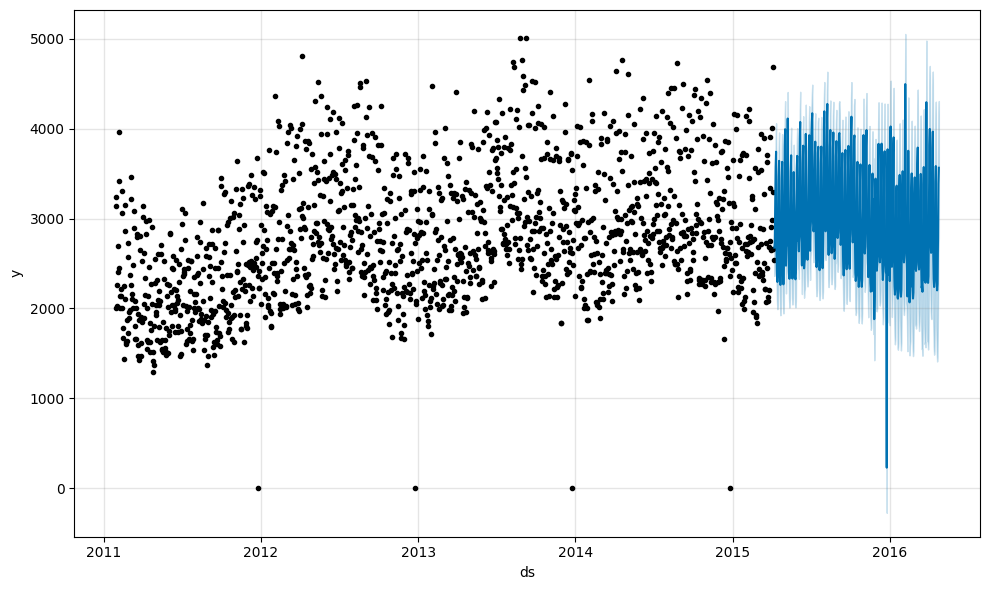

In [239]:
my_holdiday_snap_model.plot(forecast_holiday_snap)

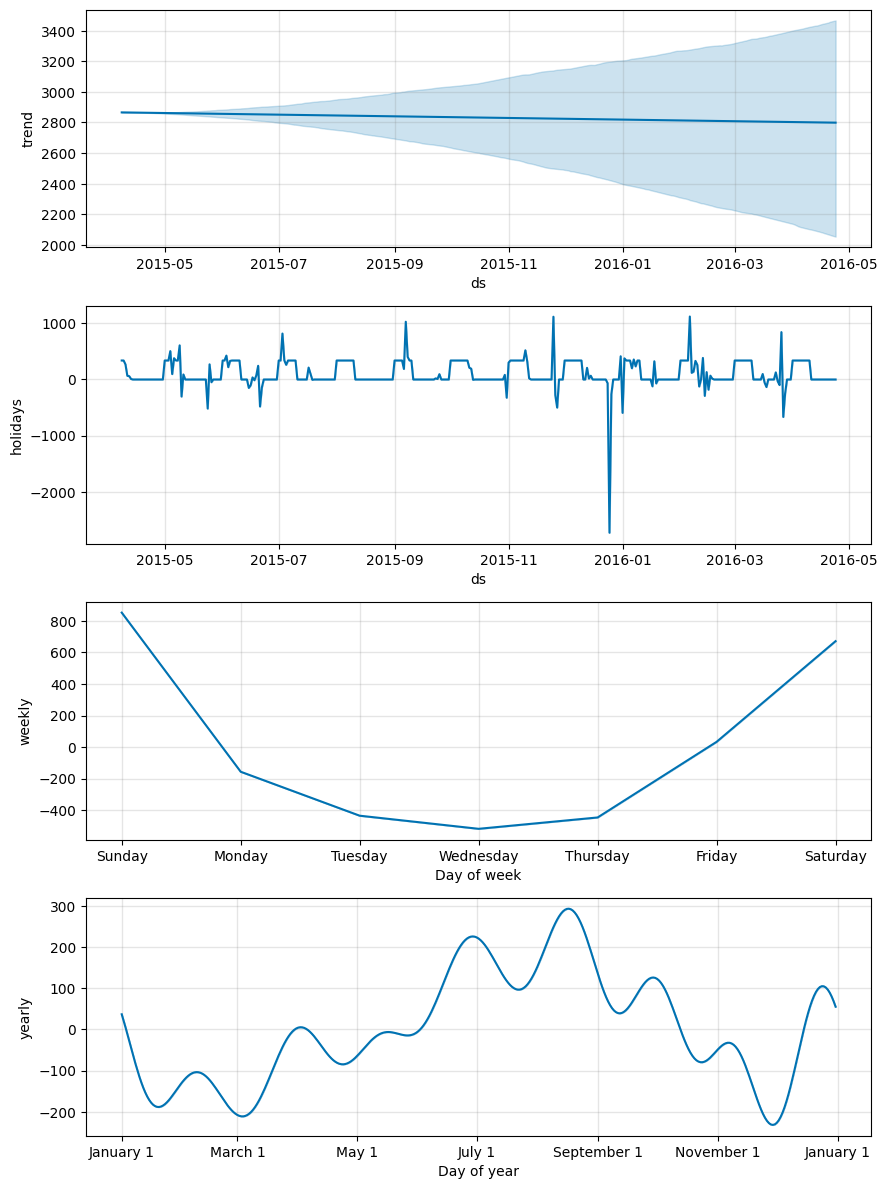

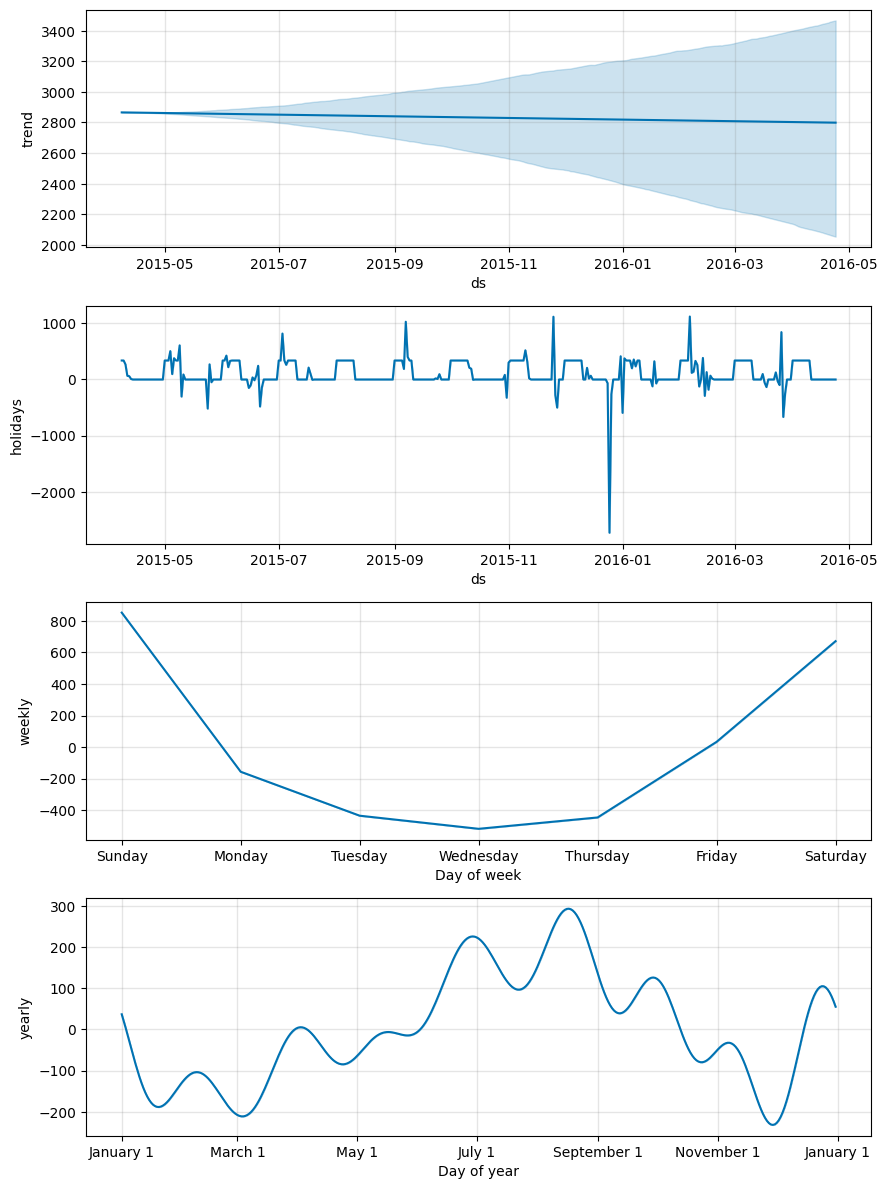

In [240]:
my_holdiday_snap_model.plot_components(forecast_holiday_snap)

In [241]:
maeProphet1 = mean_absolute_error(df_test['y'],forecast_holiday_snap['yhat'])
rmseProphet1 = np.sqrt(mean_squared_error(df_test['y'],forecast_holiday_snap['yhat']))
print(f"MAE: {maeProphet1}, RMSE: {rmseProphet1}")

MAE: 208.5300792821256, RMSE: 280.9977545402693


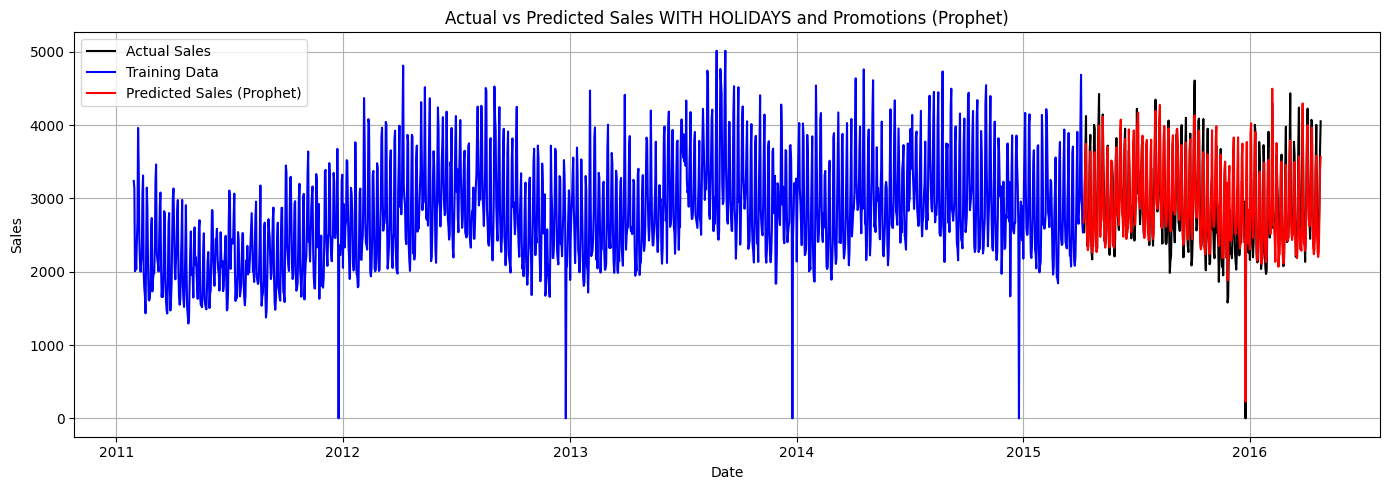

In [242]:
plt.figure(figsize=(14,5))

plt.plot(df_test['ds'], df_test['y'], label='Actual Sales', color='black')

# Plot predicted values from forecast
plt.plot(df['ds'], df['y'], label='Training Data', color='blue')
plt.plot(forecast_holiday_snap['ds'], forecast_holiday_snap['yhat'], label='Predicted Sales (Prophet)', color='red')
#plt.fill_between(forecast_holiday['ds'], forecast_holiday['yhat_lower'], forecast_holiday['yhat_upper'],
                 #color='red', alpha=0.2, label='Confidence Interval')

# Final touches
plt.title('Actual vs Predicted Sales WITH HOLIDAYS and Promotions (Prophet)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

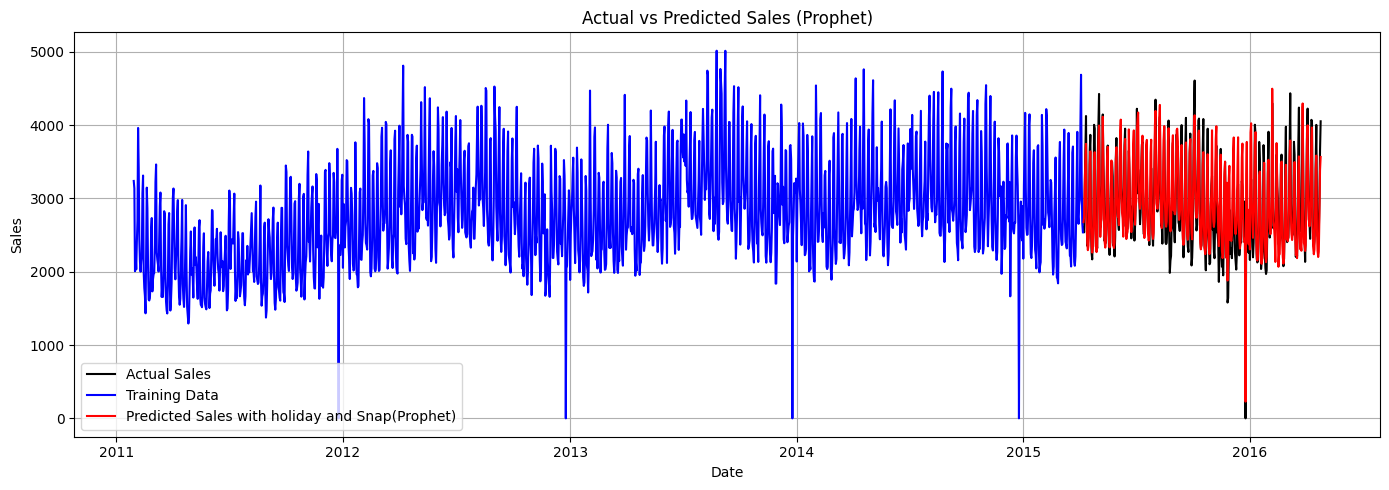

In [243]:
plt.figure(figsize=(14,5))

plt.plot(df_test['ds'], df_test['y'], label='Actual Sales', color='black')

# Plot predicted values from forecast
plt.plot(df['ds'], df['y'], label='Training Data', color='blue')
plt.plot(forecast_holiday_snap['ds'], forecast_holiday_snap['yhat'], label='Predicted Sales with holiday and Snap(Prophet)', color='red')

#plt.fill_between(forecast_holiday['ds'], forecast_holiday['yhat_lower'], forecast_holiday['yhat_upper'],
                 #color='red', alpha=0.2, label='Confidence Interval')

# Final touches
plt.title('Actual vs Predicted Sales (Prophet)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [244]:
data = {
    "Model": [
        "ARIMA",
        "SARIMAX",
        "Exponential Smoothing",
        "Prophet with Holiday",
        "Prophet with Holiday And Promotions"
    ],
    "MAE": [
        maeArima,
        maeSarimax,
        maeES,
        maeProphet,
        maeProphet1
    ],
    "RMSE": [
        rmseArima,
        rmseSarimax,
        rmseES,
        rmseProphet,
        rmseProphet1
    ]
}

df_errors = pd.DataFrame(data)

# Sort the table by RMSE in ascending order
df_errors_sorted = df_errors.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

# Display the sorted table
print(df_errors_sorted)

                                 Model         MAE        RMSE
0  Prophet with Holiday And Promotions  208.530079  280.997755
1                 Prophet with Holiday  230.412753  303.349277
2                              SARIMAX  267.018412  358.111516
3                Exponential Smoothing  309.924830  421.314064
4                                ARIMA  554.435916  647.562027


Using sell price as regressor in prophet model

In [245]:
# Filter sell prices for CA_1 and only items in FOODS category
items_in_foods = sales[sales['cat_id'] == 'FOODS']['item_id'].unique()
sell_prices_foods = sell_prices[sell_prices['item_id'].isin(items_in_foods)]

In [246]:
sales_long = sales_long.merge(sell_prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

In [247]:
food_data = sales_long[sales_long['cat_id'] == 'FOODS']
price_demand = food_data.groupby('date')[['sell_price', 'sales']].agg({'sell_price': 'mean', 'sales': 'sum'}).reset_index()

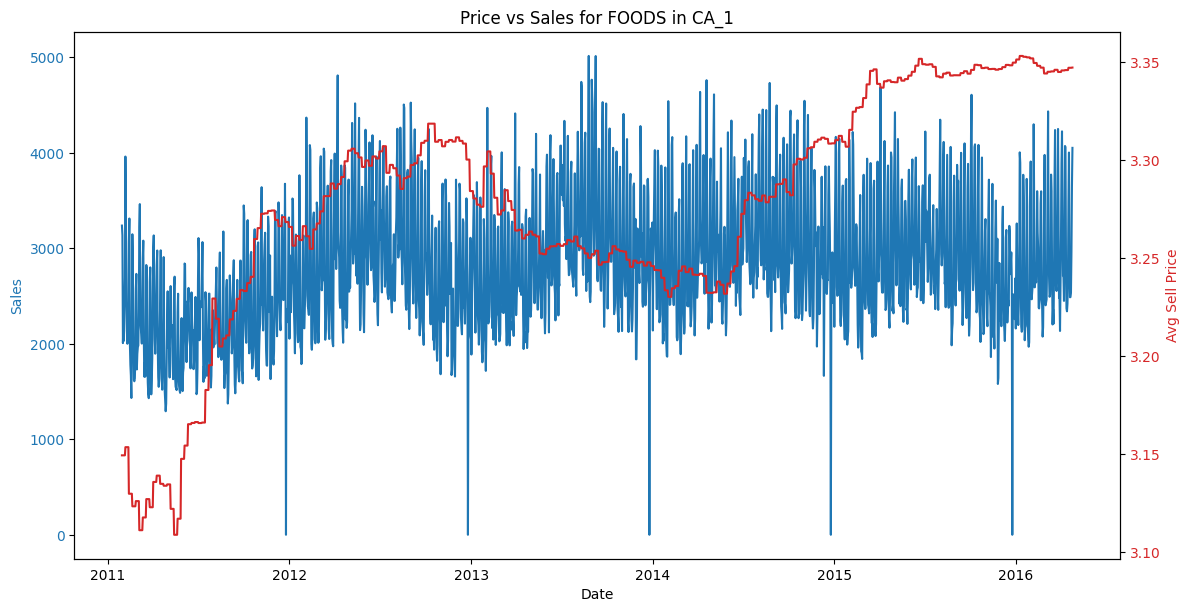

In [248]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='tab:blue')
ax1.plot(price_demand['date'], price_demand['sales'], color='tab:blue', label='Sales')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Sell Price', color='tab:red')
ax2.plot(price_demand['date'], price_demand['sell_price'], color='tab:red', label='Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Price vs Sales for FOODS in CA_1')
plt.show()


In [249]:
correlation = price_demand[['sales', 'sell_price']].corr().iloc[0, 1]
print(f"Correlation between sales and sell price: {correlation:.2f}")

Correlation between sales and sell price: 0.26


In [250]:
price_demand

date  sell_price  sales
0    2011-01-29    3.149220   3239
1    2011-01-30    3.149220   3137
2    2011-01-31    3.149220   2008
3    2011-02-01    3.149220   2258
4    2011-02-02    3.149220   2032
...         ...         ...    ...
1908 2016-04-20    3.346966   2490
1909 2016-04-21    3.346966   2533
1910 2016-04-22    3.346966   2960
1911 2016-04-23    3.347077   3655
1912 2016-04-24    3.347077   4053

[1913 rows x 3 columns]

In [251]:
df = price_demand[['date', 'sales', 'sell_price']].copy()
df.columns = ['ds', 'y', 'sell_price']
df.head()

ds     y  sell_price
0 2011-01-29  3239     3.14922
1 2011-01-30  3137     3.14922
2 2011-01-31  2008     3.14922
3 2011-02-01  2258     3.14922
4 2011-02-02  2032     3.14922

In [252]:
split_index = int(len(df) * 0.8)
train1 = df.iloc[:split_index]
test1 = df.iloc[split_index:]

In [253]:
modelProphet=Prophet(holidays=pd.concat([m5_holidays, snap_days]))
modelProphet.fit(train1)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/x55498uw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpox3v7oll/249pq58q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30997', 'data', 'file=/tmp/tmpox3v7oll/x55498uw.json', 'init=/tmp/tmpox3v7oll/249pq58q.json', 'output', 'file=/tmp/tmpox3v7oll/prophet_modelabbcrz1_/prophet_model-20250804121646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Axes: >

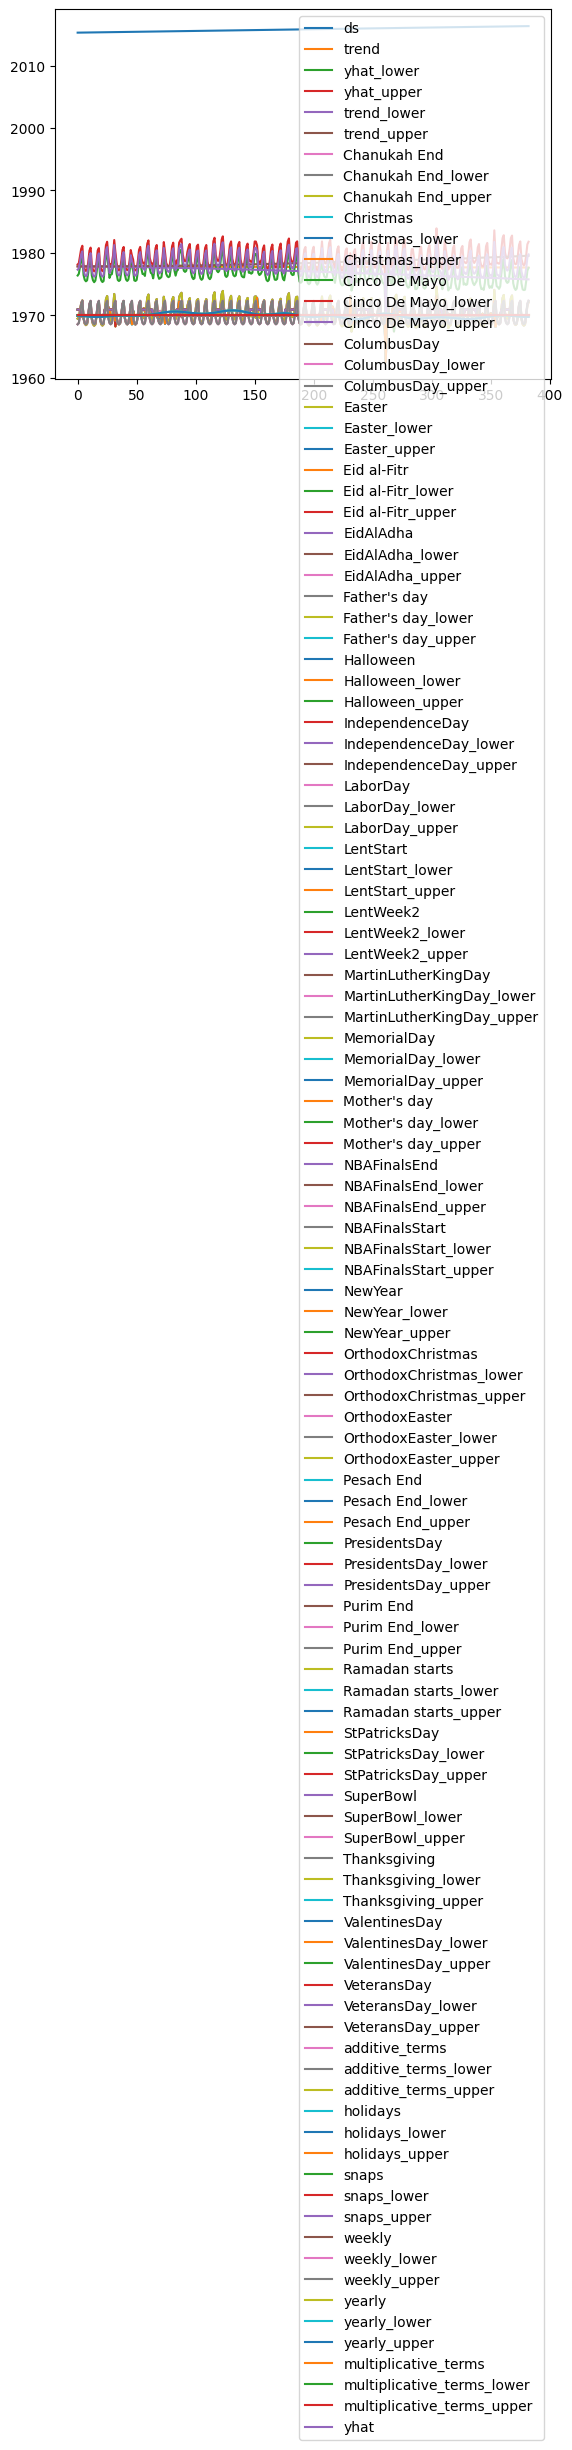

In [254]:
forecast = modelProphet.predict(test1)
forecast.head()
forecast.plot()

In [255]:
mae = mean_absolute_error(test1['y'],forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test1['y'],forecast['yhat']))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 208.5300792821256, RMSE: 280.9977545402693
